# prepare standford dog dataset with PASCAL VOC format to YOLO format

In [2]:
import os
import random
import sys
import shutil
import tqdm
import os # the main library for operating with folders and files
from shutil import copy2 # for copying file and its metadata to another location in the machine
import xml.etree.ElementTree as ET # for reading a Pascal VOC XML file
import scipy.io # for reading .mat file

import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as imgmp
import seaborn as sns
import timeit
import cv2 as cv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 

In [3]:
# import utils own functions
import importlib
import utils
importlib.reload(utils)

<module 'utils' from '/media/ismail/Elements/formation/projet7/utils.py'>

In [181]:
cd standford_dogs_dataset

[Errno 2] No such file or directory: 'standford_dogs_dataset'
/media/ismail/Elements/formation/projet7/standford_dogs_dataset


In [186]:
ls

annotation.tar*  images.tar*


In [96]:
pwd

'/media/ismail/Elements/formation/projet7/standford_dogs_dataset'

In [187]:
!tar -xf annotation.tar

In [188]:
!tar -xf images.tar

In [99]:
pwd

'/media/ismail/Elements/formation/projet7/standford_dogs_dataset'

In [189]:
ls

Annotation/  annotation.tar*  Images/  images.tar*


In [190]:
annotations_directory = '../standford_dogs_dataset/Annotation' 
images_directory = '../standford_dogs_dataset/Images'
utils.rename_directory(images_directory,annotations_directory)

True

In [191]:
races_list = os.listdir(images_directory)
annotation_list = os.listdir(annotations_directory)

/media/ismail/Elements/formation/projet7/utils.py:37: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(num_sample/num_sample+1, num_sample, i+1)


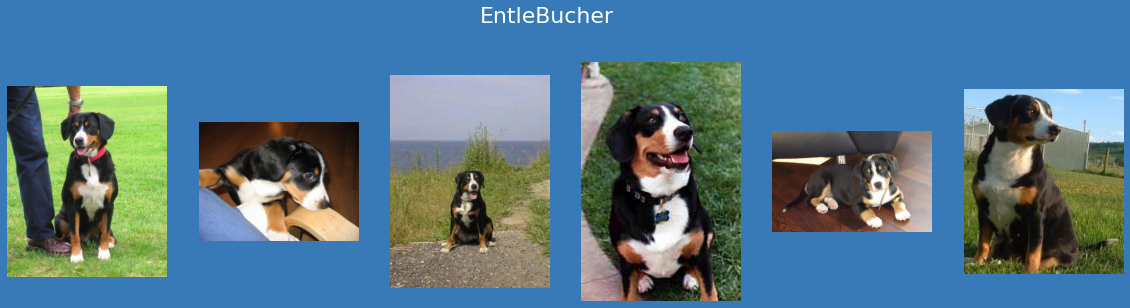

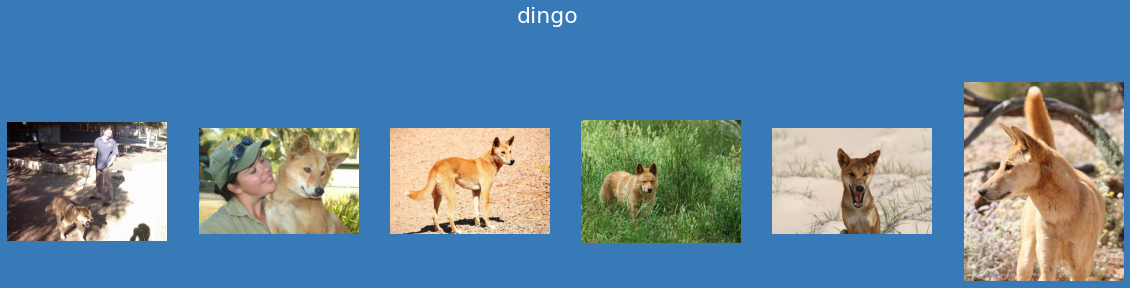

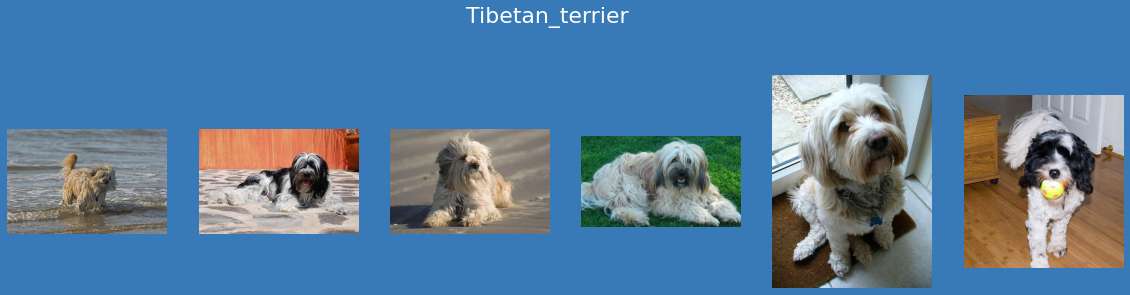

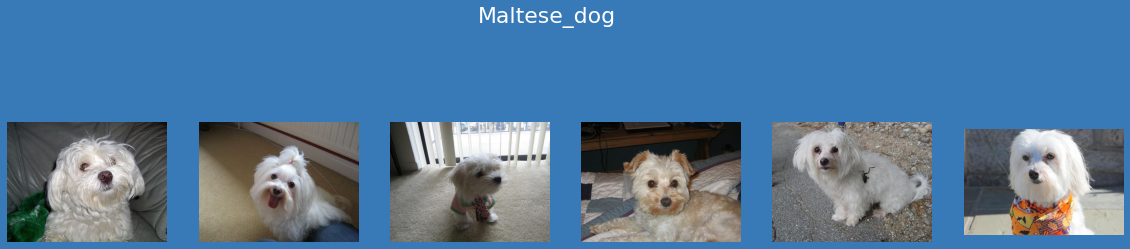

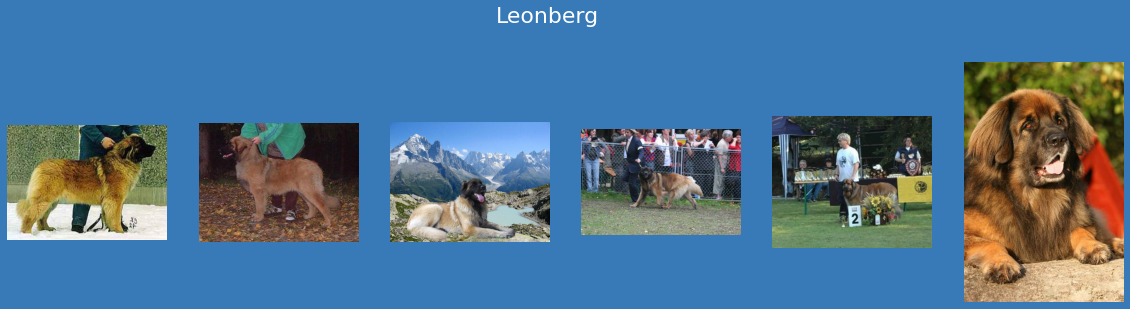

In [192]:
for i in np.random.randint(0, len(races_list), size=5):
    utils.show_images_from_directory(images_directory, races_list[i], 6)

In [193]:
print("Nombre de race dans le dataset:", (len(races_list)))
nb_photos_pear_races = [len(os.listdir(images_directory + "/" + name))for name in races_list]

Nombre de race dans le dataset: 120


In [194]:
races_list

['affenpinscher',
 'Afghan_hound',
 'African_hunting_dog',
 'Airedale',
 'American_Staffordshire_terrier',
 'Appenzeller',
 'Australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'Bedlington_terrier',
 'Bernese_mountain_dog',
 'black-and-tan_coonhound',
 'Blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'Border_collie',
 'Border_terrier',
 'borzoi',
 'Boston_bull',
 'Bouvier_des_Flandres',
 'boxer',
 'Brabancon_griffon',
 'briard',
 'Brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'Cardigan',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'Dandie_Dinmont',
 'dhole',
 'dingo',
 'Doberman',
 'English_foxhound',
 'English_setter',
 'English_springer',
 'EntleBucher',
 'Eskimo_dog',
 'flat-coated_retriever',
 'French_bulldog',
 'German_shepherd',
 'German_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'Gordon_setter',
 'Greater_Swiss_Mountain_dog',
 'Great_Dane',
 'Great_Pyrenees',
 'groenendael',
 'Scottish_deerhound',
 'Se

In [195]:
df_races = pd.DataFrame(
    index=races_list,
    data=nb_photos_pear_races,
    columns=["nb_photos"])

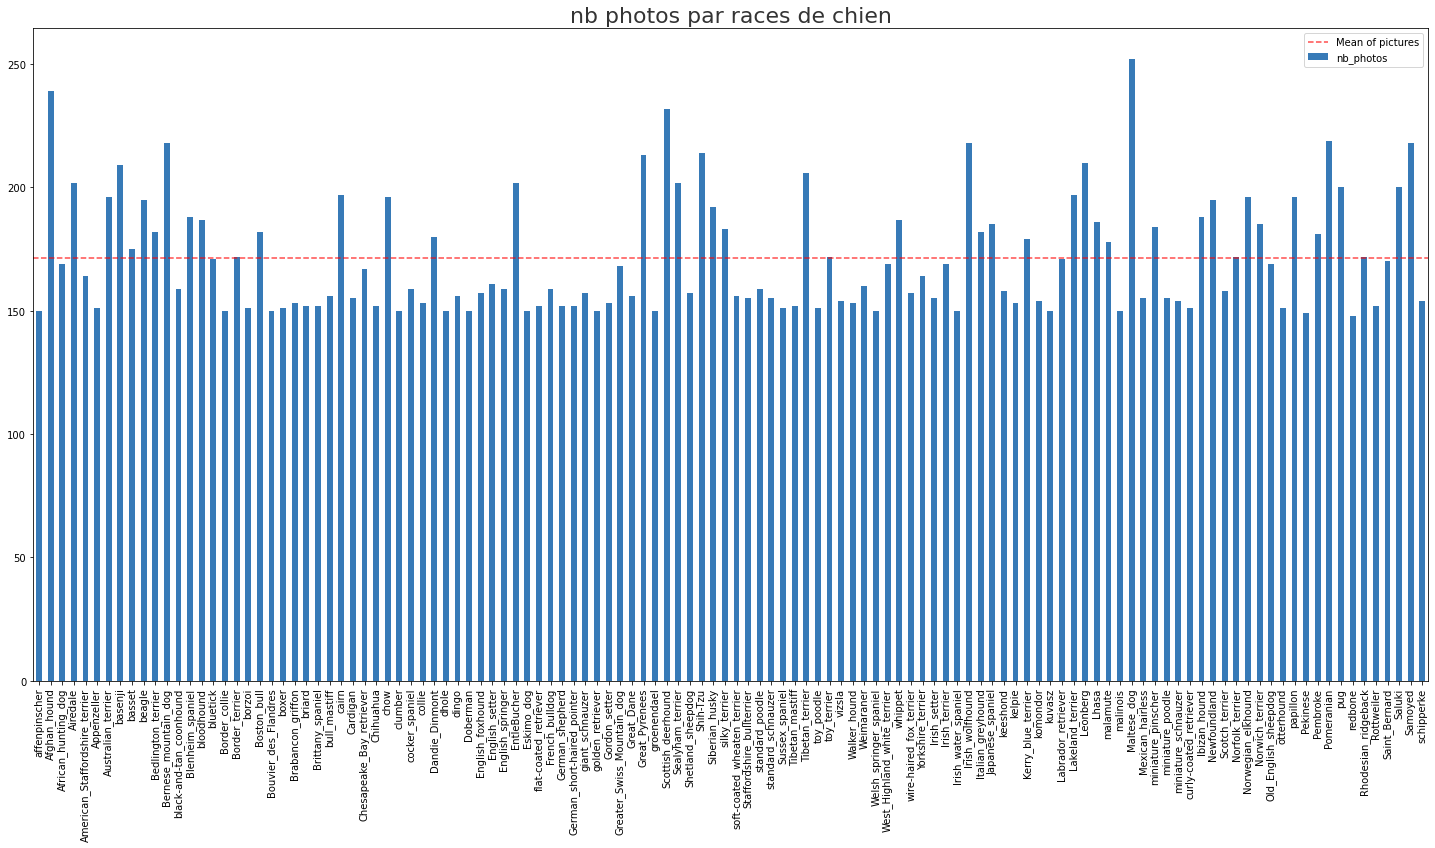

In [196]:
# Plot results
fig, ax = plt.subplots(1, 1, figsize=(25,12))
df_races.plot(kind="bar",color='#377AB7',
               legend=False,
               ax=ax)
ax.axhline(df_races["nb_photos"].mean(),
           color='r', alpha=.7,
           linestyle='--',
           label="Mean of pictures")
plt.title("nb photos par races de chien",
          color="#343434", fontsize=22)
plt.legend()
plt.show()

rename file to xml 

In [201]:
import os
import sys
annotations = []
# directory = os.path.dirname(os.path.realpath(sys.argv[0])) #get the directory of your script
for subdir, dirs, files in os.walk('/media/ismail/Elements/formation/projet7/standford_dogs_dataset/Annotation'):
    for filename in files:
        subdirectoryPath = os.path.relpath(subdir, 'Annotation') #get the path to your subdirectory
        filePath = os.path.join(subdirectoryPath, filename) #get the path to your file
#         annotations.append('./Annotation/'+filename+'.xml')
        path = './Annotation/'+ subdirectoryPath+'/'
        annotations.append(path+filename+'.xml')
#         print(subdirectoryPath)
#         print(filename.find('.xml'))
        if filename.find('.xml') == -1:            
            os.rename(path+'/'+filename, path+'/'+filename+'.xml') #rename your file
print(len(annotations)            )
# print(annotations)

20580


In [202]:
annotations[0:10]

['./Annotation/affenpinscher/n02110627_10147.xml',
 './Annotation/affenpinscher/n02110627_10185.xml',
 './Annotation/affenpinscher/n02110627_10225.xml',
 './Annotation/affenpinscher/n02110627_10437.xml',
 './Annotation/affenpinscher/n02110627_10439.xml',
 './Annotation/affenpinscher/n02110627_10447.xml',
 './Annotation/affenpinscher/n02110627_10680.xml',
 './Annotation/affenpinscher/n02110627_10787.xml',
 './Annotation/affenpinscher/n02110627_10848.xml',
 './Annotation/affenpinscher/n02110627_10859.xml']

In [ ]:
annotations = []
# directory = os.path.dirname(os.path.realpath(sys.argv[0])) #get the directory of your script
for subdir, dirs, files in os.walk('/media/ismail/Elements/formation/projet7/standford_dogs_dataset/Annotation'):
    for filename in files:
#         subdirectoryPath = os.path.relpath(subdir, 'images') #get the path to your subdirectory
        filePath = os.path.join(subdir, filename) #get the path to your file
        annotations.append(filePath)
#         print('filePath',filePath)
        if(filename.find('.xml') > 0):
#         if(filename.find('.xml') == -1):
#             print(filename)
            shutil.move(filePath, '/media/ismail/Elements/formation/projet7/standford_dogs_dataset/Annotation/'+filename)



In [204]:

# directory = os.path.dirname(os.path.realpath(sys.argv[0])) #get the directory of your script
for subdir, dirs, files in os.walk('/media/ismail/Elements/formation/projet7/standford_dogs_dataset/Images'):
    for filename in files:
#         subdirectoryPath = os.path.relpath(subdir, 'images') #get the path to your subdirectory
        filePath = os.path.join(subdir, filename) #get the path to your file

#         print('filePath',filePath)
        if(filename.find('.jpg') > 0):
            shutil.move(filePath, '/media/ismail/Elements/formation/projet7/standford_dogs_dataset/Images/'+filename)



In [205]:
cd Annotation/

/media/ismail/Elements/formation/projet7/standford_dogs_dataset/Annotation


In [206]:
!rm -r -- ./*/

In [207]:
cd ..

/media/ismail/Elements/formation/projet7/standford_dogs_dataset


In [208]:
cd Images/

/media/ismail/Elements/formation/projet7/standford_dogs_dataset/Images


In [209]:
!rm -r -- ./*/

In [210]:
cd ..

/media/ismail/Elements/formation/projet7/standford_dogs_dataset


In [211]:
ls -lR Annotation/*.xml | wc -l

20580


In [212]:
ls -lR Images/*.jpg | wc -l

20580


In [25]:
cat '/media/ismail/Elements/formation/projet7/n02085936_16331.xml'

<annotation>
	<folder>02085936</folder>
	<filename>n02085936_16331</filename>
	<source>
		<database>ImageNet database</database>
	</source>
	<size>
		<width>500</width>
		<height>375</height>
		<depth>3</depth>
	</size>
	<segment>0</segment>
	<object>
		<name>Maltese_dog</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>24</xmin>
			<ymin>28</ymin>
			<xmax>457</xmax>
			<ymax>344</ymax>
		</bndbox>
	</object>
</annotation>

In [122]:
cd standford_dogs_dataset/

[Errno 2] No such file or directory: 'standford_dogs_dataset/'
/media/ismail/Elements/formation/projet7/standford_dogs_dataset


In [51]:
pwd

'/media/ismail/Elements/formation/projet7/standford_dogs_dataset'

In [213]:
for ann in ['./Annotation/n02105855_10729.xml']:
#     print(ann)
    info_dict = extract_info_from_xml(ann)
    print(info_dict)
#     convert_to_yolov5(info_dict)

{'bboxes': [{'class': 'Shetland_sheepdog', 'xmin': 39, 'ymin': 38, 'xmax': 249, 'ymax': 342}], 'filename': '%s', 'image_size': (284, 360, 3)}


In [126]:
my_list = [os.path.join('./Annotation', x) for x in os.listdir('./Annotation') if x[-3:] == "xml"]

rename the folder and filenmae attribute xml

In [ ]:
import xml.etree.ElementTree as ET

for filename in my_list:
    tree = ET.parse(filename)
    rootElement = tree.getroot()
    name = filename.split("_")[0]
    folder = filename.split("_")[1].replace('.xml','')
    elem_filename = tree.findall('.//filename')
    elem_folder = tree.findall('.//folder')
    for elem in elem_filename:
        elem.text = name
    for elem in elem_folder:
        elem.text = folder

    tree.write(filename)

In [215]:
# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
#         print(elem.tag)
#         print(elem.text)
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [216]:
print(extract_info_from_xml('./Annotation/n02085936_16331.xml'))

{'bboxes': [{'class': 'Maltese_dog', 'xmin': 24, 'ymin': 28, 'xmax': 457, 'ymax': 344}], 'filename': './Annotation/n02085936', 'image_size': (500, 375, 3)}


In [217]:
# dogs_list = ['affenpinscher','Afghan_hound','African_hunting_dog','Airedale','American_Staffordshire_terrier','Appenzeller','Australian_terrier','basenji','basset','beagle','Bedlington_terrier','Bernese_mountain_dog','black-and-tan_coonhound','Blenheim_spaniel','bloodhound','bluetick','Border_collie','Border_terrier','borzoi','Boston_bull','Bouvier_des_Flandres','boxer','Brabancon_griffon','briard','Brittany_spaniel','bull_mastiff','cairn','Cardigan','Chesapeake_Bay_retriever','Chihuahua','chow','clumber','cocker_spaniel','collie','Rottweiler','Saint_Bernard','Saluki','Samoyed','schipperke','Scotch_terrier','Scottish_deerhound','Sealyham_terrier','Shetland_sheepdog','Shih-Tzu','Siberian_husky','silky_terrier','soft-coated_wheaten_terrier','Staffordshire_bullterrier','standard_poodle','standard_schnauzer','Sussex_spaniel','Tibetan_mastiff','Tibetan_terrier','toy_poodle','toy_terrier','vizsla','Walker_hound','Weimaraner','Welsh_springer_spaniel','West_Highland_white_terrier','whippet','wire-haired_fox_terrier','Yorkshire_terrier','Dandie_Dinmont','dhole','dingo','Doberman','English_foxhound','English_setter','English_springer','EntleBucher','Eskimo_dog','flat-coated_retriever','French_bulldog','German_shepherd','German_short-haired_pointer','giant_schnauzer','golden_retriever','Gordon_setter','Greater_Swiss_Mountain_dog','Great_Dane','Great_Pyrenees','groenendael','Irish_setter','Irish_terrier','Irish_water_spaniel','Irish_wolfhound','Italian_greyhound','Japanese_spaniel','keeshond','kelpie','Kerry_blue_terrier','komondor','kuvasz','Labrador_retriever','Lakeland_terrier','Leonberg','Lhasa','malamute','malinois','Maltese_dog','Mexican_hairless','miniature_pinscher','miniature_poodle','miniature_schnauzer','curly-coated_retriever','Ibizan_hound','Newfoundland','Rhodesian_ridgeback','Norfolk_terrier','Norwegian_elkhound','Norwich_terrier','Old_English_sheepdog','otterhound','papillon','Pekinese','Pembroke','Pomeranian','pug','redbone']
dogs_dict = {}
for i, elem in enumerate(races_list):
    dogs_dict[elem] = i
print(dogs_dict)

{'affenpinscher': 0, 'Afghan_hound': 1, 'African_hunting_dog': 2, 'Airedale': 3, 'American_Staffordshire_terrier': 4, 'Appenzeller': 5, 'Australian_terrier': 6, 'basenji': 7, 'basset': 8, 'beagle': 9, 'Bedlington_terrier': 10, 'Bernese_mountain_dog': 11, 'black-and-tan_coonhound': 12, 'Blenheim_spaniel': 13, 'bloodhound': 14, 'bluetick': 15, 'Border_collie': 16, 'Border_terrier': 17, 'borzoi': 18, 'Boston_bull': 19, 'Bouvier_des_Flandres': 20, 'boxer': 21, 'Brabancon_griffon': 22, 'briard': 23, 'Brittany_spaniel': 24, 'bull_mastiff': 25, 'cairn': 26, 'Cardigan': 27, 'Chesapeake_Bay_retriever': 28, 'Chihuahua': 29, 'chow': 30, 'clumber': 31, 'cocker_spaniel': 32, 'collie': 33, 'Dandie_Dinmont': 34, 'dhole': 35, 'dingo': 36, 'Doberman': 37, 'English_foxhound': 38, 'English_setter': 39, 'English_springer': 40, 'EntleBucher': 41, 'Eskimo_dog': 42, 'flat-coated_retriever': 43, 'French_bulldog': 44, 'German_shepherd': 45, 'German_short-haired_pointer': 46, 'giant_schnauzer': 47, 'golden_retr

In [218]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = dogs_dict

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict,filename):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
#         try:
        class_id = class_name_to_id_mapping[b["class"]]
#         except KeyError:
#             print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("./Annotation", filename.replace('.xml','.txt'))
#         save_file_name = os.path.join("annotations", info_dict["filename"]+ ".txt")
    print('save_file_name',save_file_name)
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [219]:
len(annotations)

20580

In [ ]:
# Get the annotations
annotations = [os.path.join('./Annotation', x) for x in os.listdir('./Annotation') if x[-3:] == "xml"]
annotations.sort()

# Convert and save the annotations
for ann in annotations:
    t = ann.replace('./Annotation/','')
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict,t)
# print(len(info_dict))
# annotations = [os.path.join('./standford_dogs_dataset/annotations', x) for x in os.listdir('./standford_dogs_dataset/annotations') if x[-3:] == "txt"]

In [221]:
import os.path
list_miss = []
# directory = os.path.dirname(os.path.realpath(sys.argv[0])) #get the directory of your script
path = '/media/ismail/Elements/formation/projet7/standford_dogs_dataset/Annotation'
for subdir, dirs, files in os.walk(path):
    for filename in files:
#         subdirectoryPath = os.path.relpath(subdir, 'images') #get the path to your subdirectory
        filePath = os.path.join(subdir, filename) #get the path to your file

#         print('filePath',filePath)
        if(filename.find('.xml') > 0):            
            file_exists = os.path.exists(path+'/'+filename.replace('.xml','.txt'))
            if(file_exists == False):
                list_miss.append(filename)
len(list_miss)    
# list_miss

0

In [159]:
import xml.etree.ElementTree as ET


tree = ET.parse("/media/ismail/Elements/formation/projet7/standford_dogs_dataset/Annotation/test.xml")
root = tree.getroot()
elems = tree.findall('.//filename')
print('elems', elems)
for elem in elems:
    elem.text = 'CAN'
tree.write("/media/ismail/Elements/formation/projet7/standford_dogs_dataset/Annotation/test.xml")

elems [<Element 'filename' at 0x7fbc5cd55040>]


In [135]:
pwd

'/media/ismail/Elements/formation/projet7/standford_dogs_dataset'

In [222]:
ls -lR ./Annotation/*.xml | wc -l

20580


In [223]:
ls -lR ./Annotation/*.txt | wc -l

20580


In [224]:
ls -lR ./Images/*.jpg | wc -l

20580


In [225]:
images = [os.path.join('./Images', x) for x in os.listdir('./Images') if x[-3:] == "jpg"]

In [226]:
class_name_to_id_mapping

{'affenpinscher': 0,
 'Afghan_hound': 1,
 'African_hunting_dog': 2,
 'Airedale': 3,
 'American_Staffordshire_terrier': 4,
 'Appenzeller': 5,
 'Australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'Bedlington_terrier': 10,
 'Bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'Blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'Border_collie': 16,
 'Border_terrier': 17,
 'borzoi': 18,
 'Boston_bull': 19,
 'Bouvier_des_Flandres': 20,
 'boxer': 21,
 'Brabancon_griffon': 22,
 'briard': 23,
 'Brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'Cardigan': 27,
 'Chesapeake_Bay_retriever': 28,
 'Chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'Dandie_Dinmont': 34,
 'dhole': 35,
 'dingo': 36,
 'Doberman': 37,
 'English_foxhound': 38,
 'English_setter': 39,
 'English_springer': 40,
 'EntleBucher': 41,
 'Eskimo_dog': 42,
 'flat-coated_retriever': 43,
 'French_bulldog': 44,
 'German_shepherd': 45,
 'German_short-haired_poi

In [227]:
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

In [230]:
import os
import sys
annotations = []
# directory = os.path.dirname(os.path.realpath(sys.argv[0])) #get the directory of your script
for subdir, dirs, files in os.walk('/media/ismail/Elements/formation/projet7/standford_dogs_dataset/Annotation'):
    for filename in files:
        if filename.find('.xml') == -1:
            subdirectoryPath = os.path.relpath(subdir, 'annotations') #get the path to your subdirectory
            filePath = os.path.join(subdirectoryPath, filename) #get the path to your file
            annotations.append('./Annotation/'+filename)
#             print(filename)
    #         print(filename.find('.xml'))

#             print('find')
#             path = 'annotations/'+ subdirectoryPath
print(len(annotations))

20580


In [155]:
annotations

['./Annotation/n02085620_1321.txt',
 './Annotation/n02085620_13383.txt',
 './Annotation/n02085620_1346.txt',
 './Annotation/n02085620_13964.txt',
 './Annotation/n02085620_14252.txt',
 './Annotation/n02085620_14413.txt',
 './Annotation/n02085620_14516.txt',
 './Annotation/n02085620_1455.txt',
 './Annotation/n02085620_1492.txt',
 './Annotation/n02085620_199.txt',
 './Annotation/n02085620_2053.txt',
 './Annotation/n02085620_2188.txt',
 './Annotation/n02085620_2204.txt',
 './Annotation/n02085620_2208.txt',
 './Annotation/n02085620_242.txt',
 './Annotation/n02085620_2479.txt',
 './Annotation/n02085620_2507.txt',
 './Annotation/n02085620_2517.txt',
 './Annotation/n02085620_2903.txt',
 './Annotation/n02085620_2921.txt',
 './Annotation/n02085620_2937.txt',
 './Annotation/n02085620_2973.txt',
 './Annotation/n02085620_2981.txt',
 './Annotation/n02085620_3006.txt',
 './Annotation/n02085620_3033.txt',
 './Annotation/n02085620_3045.txt',
 './Annotation/n02085620_3093.txt',
 './Annotation/n02085782_

In [231]:
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()


./Images/n02089867_2688.jpg ./Images/n02089867_2688.jpg


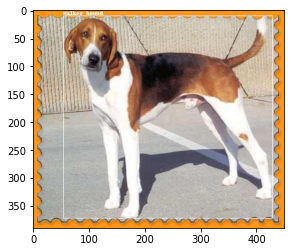

In [232]:
random.seed(8)
# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("Annotation", "Images").replace("txt", "jpg")
print(image_file,image_file)
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

./Images/n02105251_2591.jpg ./Images/n02105251_2591.jpg


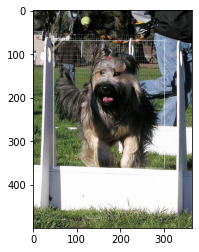

In [233]:
random.seed(10)
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("Annotation", "Images").replace("txt", "jpg")
print(image_file,image_file)
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

./Images/n02110063_9360.jpg ./Images/n02110063_9360.jpg


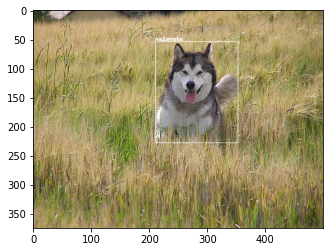

In [237]:
random.seed(110)
# Get any random annotation file 
annotation_file = random.choice(annotations)

with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("Annotation", "Images").replace("txt", "jpg")
print(image_file,image_file)
# assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [239]:
rm -rf -d ./Annotation/*.xml

In [240]:
cd ../standford_dogs_dataset/ 

/media/ismail/Elements/formation/projet7/standford_dogs_dataset


In [241]:
pwd

'/media/ismail/Elements/formation/projet7/standford_dogs_dataset'

In [242]:
ls

Annotation/  annotation.tar*  Images/  images.tar*


In [117]:
pwd

'/media/ismail/Elements/formation/projet7/standford_dogs_dataset'

In [243]:
!mv ./Annotation ./annotations

In [244]:
!mv ./Images ./images

In [1]:
[os.path.join('images', x) for x in os.listdir('images')]

NameError: name 'os' is not defined

In [245]:
from sklearn.model_selection import train_test_split
# Read images and annotations
images = [os.path.join('images', x) for x in os.listdir('images')]
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [246]:
!mkdir images/train images/val images/test annotations/train annotations/val annotations/test

In [247]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'annotations/train/')
move_files_to_folder(val_annotations, 'annotations/val/')
move_files_to_folder(test_annotations, 'annotations/test/')

In [248]:
!mv annotations labels

In [249]:
pwd

'/media/ismail/Elements/formation/projet7/standford_dogs_dataset'

In [250]:
!rm images.tar

In [251]:
!rm annotation.tar

In [252]:
cd ..

/media/ismail/Elements/formation/projet7


In [254]:
!zip -r standford_dogs_dataset.zip standford_dogs_dataset

  adding: standford_dogs_dataset/ (stored 0%)
  adding: standford_dogs_dataset/images/ (stored 0%)
  adding: standford_dogs_dataset/images/test/ (stored 0%)
  adding: standford_dogs_dataset/images/test/n02085620_11258.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02085620_11948.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02085620_1321.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02085620_14516.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02085620_1620.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02085620_2208.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02085620_3409.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02085620_3763.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02085620_3826.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02085620_3838.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02085620_3880.

  adding: standford_dogs_dataset/images/test/n02107312_6051.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02107312_6823.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02107312_7578.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02107312_759.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02107312_854.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02107574_1033.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02107574_1126.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02107574_140.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02107574_1491.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02107574_1597.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02107574_1952.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02107574_215.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02107574_2436.jpg (def

  adding: standford_dogs_dataset/images/test/n02105412_3779.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02105412_3812.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02105412_4556.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02105412_468.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02105412_5381.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02105412_676.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02108551_786.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/test/n02108551_832.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02108551_899.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02108551_9391.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02108915_12904.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02108915_1343.jpg (deflated 6%)
  adding: standford_dogs_dataset/images/test/n02108915_1513.jpg (def

  adding: standford_dogs_dataset/images/test/n02091134_12537.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02091134_13143.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02091134_13467.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02099429_2504.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02099429_258.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02099429_282.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02099429_3023.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02099429_3033.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02099429_3077.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02099429_3276.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02099429_3396.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02099429_3402.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02099429_3513.jpg

  adding: standford_dogs_dataset/images/test/n02102480_5733.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02102480_6593.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02102480_7723.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02102480_7854.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02102480_7981.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02102973_1609.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02102973_2209.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02102973_2295.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/test/n02102973_2442.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/test/n02102973_2745.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02089973_1492.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/test/n02089973_1577.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02089973_1841.jpg 

  adding: standford_dogs_dataset/images/test/n02093754_2276.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02093754_2801.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02093754_3428.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02093754_367.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02093754_4213.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02093754_4418.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02093754_4669.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/test/n02093754_4949.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02093754_5170.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02093754_5261.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02093754_5391.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02093754_5662.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02093754_6082.jpg (

  adding: standford_dogs_dataset/images/test/n02097130_982.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02097209_1.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02097209_1133.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02097209_1247.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02113978_2888.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02113978_2979.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02113978_553.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02113978_737.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02113978_759.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02115641_10286.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02115641_10395.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02115641_10570.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02115641_4601.jpg (def

  adding: standford_dogs_dataset/images/test/n02092339_3222.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02092339_392.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02106550_12828.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02106550_2301.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02106550_3930.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02106550_4397.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02106550_4962.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02106550_5710.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02106550_6286.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02106550_6978.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02106550_8146.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02106550_9508.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02106662_10490.jpg

  adding: standford_dogs_dataset/images/test/n02105505_3050.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02105505_317.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02105505_3558.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02105505_3650.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02105505_3698.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02105505_3721.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/test/n02105505_3723.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02105505_3781.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02105505_3805.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/test/n02105505_3833.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02105505_3967.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02105505_4186.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02105505_4353.jpg (

  adding: standford_dogs_dataset/images/test/n02096177_1405.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02096177_1710.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02096177_1889.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02096177_2020.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02096177_2687.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02096177_5117.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02096177_5785.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02104365_5411.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02104365_5781.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/test/n02104365_6140.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02104365_6354.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02104365_67.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02104365_6800.jpg (d

  adding: standford_dogs_dataset/images/test/n02097658_983.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02097658_9978.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02098105_1067.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02099712_3868.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02099712_475.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02099712_5338.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02099712_5599.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02099712_610.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02099712_6248.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02099712_6275.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02099712_6426.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02099712_6823.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02099712_6997.jpg (de

  adding: standford_dogs_dataset/images/test/n02105641_6363.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02105641_6735.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/test/n02105641_8556.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02105641_9289.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02105855_11529.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02105855_13039.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02105855_13256.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02105855_13311.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02105855_14509.jpg (deflated 55%)
  adding: standford_dogs_dataset/images/test/n02105855_15524.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02105855_15911.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02105855_16145.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02105855_

  adding: standford_dogs_dataset/images/test/n02091134_17567.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02091134_18140.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02091134_18905.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02091134_19124.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02091134_2339.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02091134_2626.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02091134_738.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02091134_7748.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02091134_835.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02091244_1000.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02091244_227.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02091244_2747.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02091244_2919.jpg

  adding: standford_dogs_dataset/images/test/n02104365_1325.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02104365_3950.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02108089_625.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02108551_6179.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02109525_10960.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02109961_4157.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02110185_14289.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02110806_1236.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02110806_5537.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02110958_15217.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02111129_390.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02111277_1179.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02111500_2247.jpg

  adding: standford_dogs_dataset/images/test/n02102177_3607.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02102177_3686.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02102177_3917.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02102177_3928.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02102177_3947.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02102177_3974.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02102177_4102.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02102177_626.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02102177_66.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02102318_10226.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02102318_10542.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/test/n02102318_10930.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02102318_20.jpg (d

  adding: standford_dogs_dataset/images/test/n02086646_422.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02086646_567.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02086910_10204.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02086910_1475.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02086910_1501.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02086910_1729.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02085782_2045.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02085782_2100.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02085782_2241.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/test/n02085782_2255.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02085782_2323.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/test/n02085782_2345.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/test/n02085782_2635.jpg (

  adding: standford_dogs_dataset/images/test/n02112137_112.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02112137_11536.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02112137_12792.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02112137_13330.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02112137_15277.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02112137_16665.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02112137_16830.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02092339_431.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02092339_436.jpg (deflated 10%)
  adding: standford_dogs_dataset/images/test/n02092339_4906.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02092339_5845.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02092339_6410.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02092339_6543.

  adding: standford_dogs_dataset/images/test/n02110958_13391.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02110958_13439.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02110958_13581.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02110958_13794.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02110958_13993.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02110958_14154.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02096585_10380.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/test/n02096585_1069.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02096585_12352.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02096585_1559.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02096585_1571.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02096585_1761.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/test/n02096585_1

  adding: standford_dogs_dataset/images/train/n02092002_1608.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02092002_1693.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02085620_1916.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02085620_3402.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02085620_4266.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02085620_574.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085620_8585.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02085782_143.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02085782_1855.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085782_2491.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085782_3121.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02085782_382.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02085782

  adding: standford_dogs_dataset/images/train/n02108551_6295.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108551_634.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108551_640.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108551_650.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02108551_658.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108551_660.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108551_668.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108551_728.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108551_734.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02108551_7523.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108551_7788.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108551_810.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108551_8370.

  adding: standford_dogs_dataset/images/train/n02086646_1952.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086646_1959.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086646_1993.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086646_20.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086646_2069.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02086646_2105.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086646_2114.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086646_2155.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086646_2160.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02086646_2236.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02086646_2252.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02086646_23.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02105855_

  adding: standford_dogs_dataset/images/train/n02112018_12519.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02112018_12586.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02112018_12750.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02112018_12853.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02112018_12953.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02112018_1317.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02112018_1325.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02112018_1339.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02112018_1348.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02112018_13581.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02112018_13636.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02112018_13691.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/trai

  adding: standford_dogs_dataset/images/train/n02105162_6942.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105162_7041.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105162_7112.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105162_7213.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105162_7350.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105162_7461.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105162_7593.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105162_7621.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105162_7636.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105162_7751.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105162_7847.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105162_8043.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105

  adding: standford_dogs_dataset/images/train/n02100583_10249.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_10358.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_10367.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_10388.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100583_10433.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100583_10698.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_10721.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02100583_10787.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_10834.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_10844.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100583_10960.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_11072.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/

  adding: standford_dogs_dataset/images/train/n02109961_977.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02109961_997.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02109961_9973.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_1034.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_10567.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_1058.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_10589.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_10751.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_10768.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_10785.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_10965.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_11034.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n

  adding: standford_dogs_dataset/images/train/n02111500_7583.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111500_7591.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111500_767.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111500_7935.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111500_7983.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111500_7987.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111500_8042.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111500_8174.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111500_8319.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111500_8382.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111500_8397.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111500_855.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n0211150

  adding: standford_dogs_dataset/images/train/n02110958_13560.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110958_13597.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110958_13721.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110958_13812.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110958_13930.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110958_13995.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110958_14017.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110958_14111.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110958_14142.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110958_14179.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110958_14265.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110958_14311.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/

  adding: standford_dogs_dataset/images/train/n02102318_14073.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102318_14111.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102318_14555.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102318_1458.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102318_14756.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102318_14794.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102318_14986.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102318_1597.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102318_1671.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102318_1691.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102318_1754.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102318_1983.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/

  adding: standford_dogs_dataset/images/train/n02115913_3010.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02115913_3052.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02115913_3107.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02115913_311.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02115913_3115.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02115913_3196.jpg (deflated 6%)
  adding: standford_dogs_dataset/images/train/n02113712_2653.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113712_2699.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113712_2718.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113712_2732.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113712_2746.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113712_2894.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n021137

  adding: standford_dogs_dataset/images/train/n02098413_6039.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02098413_611.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097658_427.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097658_4363.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097658_4420.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097658_4728.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097658_4778.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097658_4869.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097658_4890.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02097658_4992.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097658_5273.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097658_5420.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n0209765

  adding: standford_dogs_dataset/images/train/n02094258_2730.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02094258_2732.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094258_2751.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106550_8887.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106550_895.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106550_8994.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106550_9084.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106550_9317.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106550_9348.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106550_9432.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106550_982.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106662_10122.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n021066

  adding: standford_dogs_dataset/images/train/n02096051_8385.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02096437_702.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097209_2676.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02098105_1564.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099429_2936.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100236_486.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02101006_3938.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102177_2055.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102973_879.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105251_7086.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105855_18782.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106550_12129.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n021075

  adding: standford_dogs_dataset/images/train/n02107908_5964.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086240_2705.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086240_271.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086240_2710.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086240_2961.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086240_30.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086240_3050.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086240_306.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086240_3094.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086240_3137.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086240_3186.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086240_3227.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086240_

  adding: standford_dogs_dataset/images/train/n02089867_91.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02089867_942.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02089973_1.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02089973_1030.jpg (deflated 10%)
  adding: standford_dogs_dataset/images/train/n02089973_1066.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02089973_1076.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02089973_1078.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02089973_1106.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02089973_1132.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02089973_1232.jpg (deflated 5%)
  adding: standford_dogs_dataset/images/train/n02089973_1249.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02089973_1255.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02089973_1

  adding: standford_dogs_dataset/images/train/n02090721_954.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090721_968.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02090721_984.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091032_10079.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091032_102.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099601_5709.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099601_5736.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099601_5857.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099601_5876.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099601_5893.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099601_6099.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099601_6105.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099601

  adding: standford_dogs_dataset/images/train/n02090379_5182.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02090379_5196.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090379_5200.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090379_5209.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090379_521.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090379_5326.jpg (deflated 7%)
  adding: standford_dogs_dataset/images/train/n02090379_5393.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090379_5414.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090379_5483.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090379_5493.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090379_5504.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090379_5525.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n021108

  adding: standford_dogs_dataset/images/train/n02088632_725.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088632_744.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088632_793.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088632_813.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088632_819.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088632_834.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088632_864.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088632_874.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088632_916.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088632_926.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088632_982.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02089078_1025.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02089078_1026.jp

  adding: standford_dogs_dataset/images/train/n02098413_1719.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02098413_17364.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02098413_178.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02098413_1784.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02098413_17895.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02098413_17946.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107312_3864.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107312_3888.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107312_3980.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107312_3994.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02107312_4049.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107312_4065.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n021

  adding: standford_dogs_dataset/images/train/n02108915_5201.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02108915_5306.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108915_5319.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108915_5337.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108915_5367.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108915_5458.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108915_553.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108915_5596.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108915_5667.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108915_5669.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108915_57.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108915_571.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108915_

  adding: standford_dogs_dataset/images/train/n02097474_5820.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097474_5841.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097474_5851.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097474_5867.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097474_5996.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097474_6021.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097474_6035.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097474_6102.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097047_3978.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097047_4274.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097047_4440.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097047_4443.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097

  adding: standford_dogs_dataset/images/train/n02085936_4916.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02085936_4924.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_4929.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_500.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_5010.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_5023.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_5067.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_5107.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_517.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088094_12364.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_1254.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_12563.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088

  adding: standford_dogs_dataset/images/train/n02116738_4098.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02116738_4102.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02116738_431.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02116738_4323.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02116738_4335.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02116738_4367.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02116738_4382.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02116738_4461.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02116738_4508.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02116738_4641.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02116738_4720.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02116738_4732.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n021167

  adding: standford_dogs_dataset/images/train/n02101556_7617.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02101556_7650.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02101556_7677.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02101556_7927.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02101556_7939.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02101556_8039.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100877_3936.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100877_407.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100877_4099.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02100877_4159.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100877_4259.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100877_427.jpg (deflated 5%)
  adding: standford_dogs_dataset/images/train/n0210087

  adding: standford_dogs_dataset/images/train/n02106030_17586.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_17662.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_17669.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_17732.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106030_17733.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_17752.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106030_17906.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_17923.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106030_18040.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_18142.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106030_1821.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_18288.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/t

  adding: standford_dogs_dataset/images/train/n02110185_9712.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110185_9833.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110185_9846.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110185_9975.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110627_10185.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110627_10225.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110627_10437.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110627_10439.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110627_10787.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02110627_10859.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110627_10986.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110627_11211.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/trai

  adding: standford_dogs_dataset/images/train/n02106166_4625.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106166_4733.jpg (deflated 6%)
  adding: standford_dogs_dataset/images/train/n02106166_4753.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106166_476.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106166_4957.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02106166_4966.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02106166_5.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106166_5047.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02106166_5057.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106166_5073.jpg (deflated 5%)
  adding: standford_dogs_dataset/images/train/n02106166_5097.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106166_5607.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106166_

  adding: standford_dogs_dataset/images/train/n02101388_3294.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02101388_3344.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02101388_3357.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02101388_3365.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02101388_3416.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_18750.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_18782.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_1880.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_19390.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_1994.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_210.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_2390.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n021

  adding: standford_dogs_dataset/images/train/n02097047_1527.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097047_1532.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097047_1553.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097047_1556.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097047_157.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097047_162.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097047_1626.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097047_1705.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097047_1721.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097047_1791.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097047_1825.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097047_1866.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n0209704

  adding: standford_dogs_dataset/images/train/n02106662_3815.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106662_3953.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02106662_4021.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106662_4059.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02106662_4201.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106662_4402.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106662_4498.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02106662_4522.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02106662_466.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106662_5169.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106662_5795.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106662_590.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n0209399

  adding: standford_dogs_dataset/images/train/n02098105_2297.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02098105_2399.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02098105_2404.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111277_392.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111277_3951.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111277_399.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111277_3990.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111277_413.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111277_421.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111277_4218.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111277_4263.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111277_4292.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111277_

  adding: standford_dogs_dataset/images/train/n02091635_758.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091635_782.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091635_831.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091635_863.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091635_873.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091635_923.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091635_938.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091635_963.jpg (deflated 24%)
  adding: standford_dogs_dataset/images/train/n02091635_965.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02091635_979.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02091831_10290.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091831_1036.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02091831_1057

  adding: standford_dogs_dataset/images/train/n02113023_6869.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113023_7038.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113023_710.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113023_724.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091831_725.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02091831_7287.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091831_735.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091831_736.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091831_7393.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091831_749.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091831_7497.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091831_7769.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091831_78

  adding: standford_dogs_dataset/images/train/n02107142_9379.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107142_9621.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02107142_971.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107142_9772.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02107312_105.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107312_1154.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107312_1195.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107312_1207.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107312_1233.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107312_1316.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107312_1520.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107312_1586.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n0210731

  adding: standford_dogs_dataset/images/train/n02093647_1591.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02093647_160.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093647_1600.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094258_1004.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02094258_103.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094258_1036.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094258_1065.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094258_1106.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02094258_112.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02094258_1130.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02094258_1132.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094258_1150.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094258

  adding: standford_dogs_dataset/images/train/n02088466_7962.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088466_7963.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088466_7973.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088466_8015.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088466_8032.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097298_2492.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097298_2500.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097298_2583.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097298_2609.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097298_2671.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097298_2722.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097298_2792.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097

  adding: standford_dogs_dataset/images/train/n02099267_3092.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099267_3130.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099267_3185.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02099267_3240.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099267_3290.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099267_3390.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099267_3405.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099267_3428.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099267_3431.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099267_3433.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085782_2584.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02085782_2640.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085

  adding: standford_dogs_dataset/images/train/n02115641_7355.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02115641_7400.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02115641_7549.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02115641_7620.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02115641_7679.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02115641_7898.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02115641_8168.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02115641_8463.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02115641_8474.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02115641_8492.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02115641_8578.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02115641_8682.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02115

  adding: standford_dogs_dataset/images/train/n02108089_12738.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108089_12739.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108089_12827.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108089_13340.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108089_1353.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108089_1355.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108089_1357.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02108089_13738.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113624_5459.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113624_5523.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113624_5659.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113624_5723.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n

  adding: standford_dogs_dataset/images/train/n02106030_1199.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_124.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02106030_12714.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_14089.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_14143.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106030_14653.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_14677.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_14736.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02106030_14738.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_14943.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106030_14999.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106030_15008.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/tra

  adding: standford_dogs_dataset/images/train/n02099849_3645.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099849_3680.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099849_3723.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099849_3736.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099849_3753.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099849_3777.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02099849_3789.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099849_3810.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099849_3881.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099849_3897.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099849_3911.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111889_13281.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n0211

  adding: standford_dogs_dataset/images/train/n02108915_3382.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108915_341.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108915_3464.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108915_350.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113186_50.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113186_5242.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113186_5340.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113186_5618.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113186_5819.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113186_5841.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113186_6058.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113186_612.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113186_6

  adding: standford_dogs_dataset/images/train/n02100735_1305.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100735_1388.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100735_1467.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100735_1680.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100735_2051.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100735_2145.jpg (deflated 8%)
  adding: standford_dogs_dataset/images/train/n02100735_216.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100735_2375.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100735_2444.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100735_2464.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100735_2851.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100735_292.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n0210073

  adding: standford_dogs_dataset/images/train/n02105641_3724.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105641_4150.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105641_4268.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105641_4443.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105641_4577.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105641_4594.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107312_6246.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107312_6275.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107312_6375.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107312_6380.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107312_6487.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107312_6541.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107

  adding: standford_dogs_dataset/images/train/n02090721_4207.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090721_4276.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090721_4290.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090721_4309.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090721_4326.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090721_4341.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090721_4353.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090721_4376.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090721_4433.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090721_448.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02090721_452.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090721_464.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090721

  adding: standford_dogs_dataset/images/train/n02088094_899.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_907.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_908.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_913.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_9197.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088094_9220.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_9229.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_93.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_986.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_988.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02088238_10005.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088238_10013.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088238_10

  adding: standford_dogs_dataset/images/train/n02110063_9703.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_9861.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110185_10047.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110185_10171.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110185_10175.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110185_10273.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110185_10360.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110185_1066.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110185_10844.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02110185_10875.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110185_10898.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110185_10902.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/tra

  adding: standford_dogs_dataset/images/train/n02102177_702.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102177_707.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02102177_715.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102177_716.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102177_803.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102177_818.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102177_839.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102177_859.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102177_922.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102177_964.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102177_967.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102318_10000.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102318_10019.

  adding: standford_dogs_dataset/images/train/n02086910_6293.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02086910_6305.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086910_6306.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086910_6317.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_2119.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099429_212.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099429_2122.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02099429_2149.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02099429_2170.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_2227.jpg (deflated 10%)
  adding: standford_dogs_dataset/images/train/n02099429_2236.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02099429_2263.jpg (deflated 6%)
  adding: standford_dogs_dataset/images/train/n02099

  adding: standford_dogs_dataset/images/train/n02107142_1193.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107142_12076.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107142_12182.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107142_12488.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107142_1251.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107142_12739.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107142_12749.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107142_1306.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107142_13356.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02107142_13483.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107142_13677.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107142_14066.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/tra

  adding: standford_dogs_dataset/images/train/n02112018_2728.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02112018_276.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02112018_2782.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02112018_2786.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02112018_2790.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02112018_2811.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02112018_2821.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02112018_2846.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02112018_2896.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02112018_290.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02112018_2931.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02112018_2991.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n0211201

  adding: standford_dogs_dataset/images/train/n02090622_5098.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090622_5211.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090622_5602.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090622_585.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090622_5858.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090622_5890.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090622_5956.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090622_6026.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090622_6055.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090622_6080.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090622_6094.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090622_6106.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n020906

  adding: standford_dogs_dataset/images/train/n02101388_5977.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02101388_881.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02101556_1991.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02101556_374.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02101556_4875.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02101556_6228.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02101556_8093.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102040_1306.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102040_3476.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102040_5283.jpg (deflated 8%)
  adding: standford_dogs_dataset/images/train/n02102040_709.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102040_995.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102177_

  adding: standford_dogs_dataset/images/train/n02110063_15160.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_15327.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_15332.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_15416.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_15481.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_15580.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_15727.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_1581.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02112350_8390.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02112350_8391.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02112350_8434.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02112350_8454.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train

  adding: standford_dogs_dataset/images/train/n02095570_5404.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095570_5484.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085782_385.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085782_3855.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085782_3870.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02085782_3889.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085782_3896.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085782_3899.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02085782_3966.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085782_3979.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02085782_3990.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02085782_4042.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n020857

  adding: standford_dogs_dataset/images/train/n02100877_863.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100877_8800.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100877_916.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100877_92.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100877_985.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02101006_1059.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02101006_1126.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02089867_2758.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02089867_277.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02089867_2815.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02089867_2880.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02089867_2950.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02089867_30

  adding: standford_dogs_dataset/images/train/n02091134_15038.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091134_15210.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02091134_15245.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091134_15251.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091134_15360.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091134_15398.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091134_15713.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091134_15784.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091134_15846.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091134_15865.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091134_15938.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091134_16005.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/

  adding: standford_dogs_dataset/images/train/n02093991_2056.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093991_2101.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093991_2126.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093991_2250.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093991_2322.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093991_2437.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093991_2442.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093991_2451.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093991_247.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093991_2498.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093991_2518.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093991_2533.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n020939

  adding: standford_dogs_dataset/images/train/n02091467_5074.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02091467_5134.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02095570_1437.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02095570_1438.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095570_1445.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02095570_1461.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095570_1482.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02095570_1489.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02095570_1547.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02095570_1575.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095570_1590.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02095570_1609.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02095

  adding: standford_dogs_dataset/images/train/n02096437_3992.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02096437_4.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02096437_4041.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02096437_4131.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096437_4184.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096437_4276.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02096437_429.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096437_4318.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02096437_4384.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02096437_4392.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096437_4401.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096437_4416.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02096437_

  adding: standford_dogs_dataset/images/train/n02095889_3110.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02095889_3150.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095889_3159.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095889_341.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095889_347.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093754_7390.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093754_7403.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093754_7440.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093754_7532.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093754_7552.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093754_7575.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093754_7701.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n0209375

  adding: standford_dogs_dataset/images/train/n02113712_112.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113712_1136.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113712_1147.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113712_1226.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113712_1252.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113712_1272.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113712_1302.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113712_1395.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113712_142.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113712_1448.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113712_1541.jpg (deflated 5%)
  adding: standford_dogs_dataset/images/train/n02113712_1546.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n0211371

  adding: standford_dogs_dataset/images/train/n02108089_6008.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108089_6223.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02108089_6295.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108089_6418.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02108089_6429.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108089_7259.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108089_7319.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108089_7431.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108089_7456.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108089_770.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108089_78.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108089_7853.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108089

  adding: standford_dogs_dataset/images/train/n02099712_2897.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099712_3197.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099712_3258.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099712_3273.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099712_328.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099712_3340.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099712_3364.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099712_3430.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099712_3500.jpg (deflated 8%)
  adding: standford_dogs_dataset/images/train/n02099712_357.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099712_3613.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099712_365.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099712

  adding: standford_dogs_dataset/images/train/n02092339_5818.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02092339_5978.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02092339_5999.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_7887.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_7892.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02104365_7906.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_7927.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02104365_7953.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_7956.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_8119.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02104365_8156.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_8161.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02104

  adding: standford_dogs_dataset/images/train/n02107683_3034.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107683_3046.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107683_3088.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107683_3140.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107683_3291.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107683_3297.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107683_33.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107683_333.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02107683_3351.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107683_3379.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107683_3382.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107683_34.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107683_3

  adding: standford_dogs_dataset/images/train/n02106550_5028.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106550_5133.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106550_5184.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02106550_5222.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106550_5271.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106550_5311.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02106550_5752.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106550_5754.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106550_5928.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106550_6074.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106550_6130.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106550_6192.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108

  adding: standford_dogs_dataset/images/train/n02107908_3190.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107908_3254.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107908_3387.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107908_3450.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107908_3720.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107908_3728.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107908_3791.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107908_3926.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107908_396.jpg (deflated 5%)
  adding: standford_dogs_dataset/images/train/n02107908_3971.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107908_4030.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107908_406.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n0209325

  adding: standford_dogs_dataset/images/train/n02102480_6995.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102480_6998.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102480_7025.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102480_7189.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102480_7212.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102480_7238.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102480_7371.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102480_7417.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102480_7449.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102480_7472.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102480_7580.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102480_7591.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102

  adding: standford_dogs_dataset/images/train/n02111889_2476.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02111889_2544.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111889_2650.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111889_2789.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_974.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_976.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_990.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02111277_10160.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111277_1018.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111277_1023.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111277_10237.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111277_1040.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n021112

  adding: standford_dogs_dataset/images/train/n02105641_12610.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105641_12614.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105641_12816.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105641_1362.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105641_13779.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105641_13807.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02105641_13952.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105641_1411.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_841.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099429_853.jpg (deflated 5%)
  adding: standford_dogs_dataset/images/train/n02099429_869.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_878.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n020

  adding: standford_dogs_dataset/images/train/n02107683_5538.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02107683_5663.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107683_5684.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107683_5699.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107683_570.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107683_5745.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107683_5751.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107683_5821.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107683_5823.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107683_5840.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107683_5946.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107683_5960.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n021076

  adding: standford_dogs_dataset/images/train/n02105855_7495.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105855_7527.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105855_7560.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105855_7607.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105855_7612.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105855_7708.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105855_7717.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02105855_7763.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_3301.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_3359.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_3367.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02111129_3388.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111

  adding: standford_dogs_dataset/images/train/n02091032_1121.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091032_1140.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091032_11549.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091032_1158.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091032_11626.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091032_11660.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091032_1170.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02091032_11998.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091032_12013.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091032_12113.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091032_12144.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091032_1228.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train

  adding: standford_dogs_dataset/images/train/n02093991_434.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02093991_4356.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093991_4404.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093991_4441.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093991_4462.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093991_4482.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093991_4490.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02093991_4515.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093991_4524.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093991_4589.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093991_4627.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093991_467.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n0209399

  adding: standford_dogs_dataset/images/train/n02102040_841.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102040_858.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102040_876.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102040_902.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102040_95.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102040_97.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102040_986.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102040_988.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088632_3923.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02088632_3993.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088632_4002.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088632_4024.jpg (deflated 15%)
  adding: standford_dogs_dataset/images/train/n02088632_4058.

  adding: standford_dogs_dataset/images/train/n02106030_15840.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106030_15857.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_15858.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106030_15888.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_15923.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106030_15958.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106030_16000.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106030_16011.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_16029.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_16046.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106030_16080.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106030_16095.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/

  adding: standford_dogs_dataset/images/train/n02086240_5140.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086240_5246.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086240_5316.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086240_533.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086240_5352.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086240_5443.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107574_1426.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107574_1437.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107574_1441.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107574_1459.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107574_1467.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02107574_1472.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n021075

  adding: standford_dogs_dataset/images/train/n02085936_2889.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_2927.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_296.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02085936_3000.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_3108.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02085936_3207.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_3217.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_3292.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_3315.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_3326.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107312_5188.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107312_5287.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n021073

  adding: standford_dogs_dataset/images/train/n02094114_4361.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02094114_4394.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094114_4397.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02094114_4445.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02094114_4501.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094114_4506.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02089867_1048.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02089867_1062.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02089867_1079.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02089867_1082.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02089867_1133.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02089867_1208.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02089

  adding: standford_dogs_dataset/images/train/n02099429_1465.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_1468.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099429_1472.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_1504.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_159.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_16.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099429_1627.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02099429_1654.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_1662.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099429_1696.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099429_1701.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_1744.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099429

  adding: standford_dogs_dataset/images/train/n02091467_2366.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091467_2503.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091467_2646.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091467_2663.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091467_272.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091467_2723.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091467_2849.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091467_2856.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091467_287.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091467_2930.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02115641_9110.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02115641_925.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02115641

  adding: standford_dogs_dataset/images/train/n02090379_4561.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090379_4609.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090379_4611.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090379_4667.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090379_4673.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090379_4681.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090379_4683.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090379_4708.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090379_4718.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090379_4754.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090379_4871.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090379_4875.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090

  adding: standford_dogs_dataset/images/train/n02106382_1925.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02106382_1946.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106382_1963.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106382_2012.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02106382_2021.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106382_2083.jpg (deflated 5%)
  adding: standford_dogs_dataset/images/train/n02106382_2105.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02106382_2195.jpg (deflated 11%)
  adding: standford_dogs_dataset/images/train/n02106382_2305.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106382_2323.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02106382_2343.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02106382_2365.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n0210

  adding: standford_dogs_dataset/images/train/n02110063_16533.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_16539.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_16612.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_16630.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_16696.jpg (deflated 8%)
  adding: standford_dogs_dataset/images/train/n02110063_16713.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_16752.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_16763.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02110063_16966.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_17073.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_17138.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110063_17190.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/

  adding: standford_dogs_dataset/images/train/n02096437_2364.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02096437_2376.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096437_2455.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02116738_10872.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02116738_10895.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02116738_1097.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02116738_1180.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02116738_124.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02116738_1591.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02116738_1627.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02116738_1739.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02116738_1815.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n0211

  adding: standford_dogs_dataset/images/train/n02096585_2821.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096585_2828.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096585_2900.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096585_2947.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096585_296.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02096585_3105.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096585_311.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096585_318.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096585_341.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096585_342.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02096585_353.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02096585_3681.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096585_36

  adding: standford_dogs_dataset/images/train/n02112706_277.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02112706_663.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113023_1258.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094433_1770.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02094433_1824.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094433_1868.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094433_1869.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094433_194.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094433_2022.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094433_2041.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02094433_2105.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02094433_2114.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094433

  adding: standford_dogs_dataset/images/train/n02105855_18141.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105855_1816.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105855_18288.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105855_18293.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02105855_18443.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105855_18496.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088466_8064.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088466_8078.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088466_8105.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088466_8144.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088466_8156.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088466_8184.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n

  adding: standford_dogs_dataset/images/train/n02095314_1829.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02095314_1866.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02095314_188.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095314_1884.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095314_1894.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02095314_1917.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095314_1945.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095314_1969.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02095314_1976.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095314_1997.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02095314_2.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095314_2038.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095314_

  adding: standford_dogs_dataset/images/train/n02089973_1763.jpg (deflated 7%)
  adding: standford_dogs_dataset/images/train/n02089973_1799.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02089973_1803.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02089973_186.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02089973_1877.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02089973_1907.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02089973_1957.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02089973_2017.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02089973_2045.jpg (deflated 5%)
  adding: standford_dogs_dataset/images/train/n02089973_2054.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02089973_2068.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02089973_2073.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n020938

  adding: standford_dogs_dataset/images/train/n02113799_6304.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113799_639.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113799_6447.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113799_6448.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113799_6634.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113799_6704.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088466_4825.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088466_4907.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088466_5025.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088466_5131.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088466_5212.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088466_5432.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n020884

  adding: standford_dogs_dataset/images/train/n02097047_263.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097047_2649.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097047_2701.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097047_271.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097047_2776.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02097047_2865.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02097047_2871.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097047_2910.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097047_2917.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097047_2937.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097047_3035.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097047_3074.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n0209704

  adding: standford_dogs_dataset/images/train/n02086079_8074.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086079_8127.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086079_8204.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02086079_8229.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02086079_8595.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086079_869.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086079_8726.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086079_8826.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086079_8902.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086079_904.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086079_9151.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086079_9316.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n0208607

  adding: standford_dogs_dataset/images/train/n02102973_2805.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102973_2813.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102973_2836.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102973_2850.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02102973_2870.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102973_2902.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102973_2904.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02102973_2958.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102973_3073.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02102973_3195.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102973_3282.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102973_3287.jpg (deflated 5%)
  adding: standford_dogs_dataset/images/train/n02102

  adding: standford_dogs_dataset/images/train/n02105162_9368.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105162_9410.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105162_9557.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105162_9821.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105162_9927.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105162_9934.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105162_9969.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105162_9995.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105251_12.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105251_1201.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105251_1240.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105251_1588.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n0210525

  adding: standford_dogs_dataset/images/train/n02100583_3027.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_3132.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100583_3263.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100583_3274.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_3309.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_3383.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100583_3748.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_3987.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100583_4439.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_609.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02110063_6174.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110063_6276.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n021100

  adding: standford_dogs_dataset/images/train/n02108089_9724.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108422_1958.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108422_3186.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108422_3985.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108422_5595.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108551_11271.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108551_211.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108551_2836.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108551_3840.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02108551_5547.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108915_10204.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02108915_2326.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n0210

  adding: standford_dogs_dataset/images/train/n02092002_1767.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02092002_1828.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02092002_1937.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02092002_1962.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02092002_198.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02092002_2097.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02092002_2129.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02092002_2184.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02092002_2257.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02092002_2269.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02092002_228.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02092002_2294.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n0209200

  adding: standford_dogs_dataset/images/train/n02110958_14832.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110958_14927.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110958_14984.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110958_14996.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110958_15014.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02110958_15015.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110958_15120.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110958_15129.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110958_15130.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110958_15171.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110958_152.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110958_15351.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/tr

  adding: standford_dogs_dataset/images/train/n02086910_695.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086910_7019.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086910_7156.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02086910_7280.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086910_7405.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086910_7412.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086910_7426.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086910_7456.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086910_7514.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02086910_7609.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086910_7766.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086910_7837.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n020869

  adding: standford_dogs_dataset/images/train/n02104365_5740.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_5970.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_6199.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_6291.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_6384.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_6395.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02104365_6428.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097209_3599.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097209_3630.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097209_3671.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097209_3730.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097209_3811.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097

  adding: standford_dogs_dataset/images/train/n02097658_188.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097658_1910.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097658_1917.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097658_2012.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097658_2022.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097658_2035.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097658_2041.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097658_2048.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097658_2051.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097658_2069.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097658_2087.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097658_214.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n0210297

  adding: standford_dogs_dataset/images/train/n02098413_20830.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02098413_21040.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02098413_21411.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02098413_2169.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02098413_2308.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02098413_2400.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02098413_2402.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02098413_244.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02098413_2441.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02098413_2490.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02098413_2536.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02098413_2582.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n021

  adding: standford_dogs_dataset/images/train/n02101006_3882.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02101006_3933.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100236_5961.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02100583_11231.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100583_12663.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_18.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100583_4473.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_854.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100735_10175.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100735_3847.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100735_5876.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100735_7078.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02100

  adding: standford_dogs_dataset/images/train/n02093256_11836.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093256_12174.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093256_12347.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093256_1272.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093256_1275.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093256_12785.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093256_1309.jpg (deflated 6%)
  adding: standford_dogs_dataset/images/train/n02093256_13267.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093256_13419.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093256_1371.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093256_1384.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093256_14522.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train

  adding: standford_dogs_dataset/images/train/n02105412_893.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105505_2069.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105505_3008.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105505_3957.jpg (deflated 9%)
  adding: standford_dogs_dataset/images/train/n02105505_43.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02105641_10048.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105641_14263.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105641_277.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105641_4660.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105641_6350.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105641_8720.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105855_11445.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n021058

  adding: standford_dogs_dataset/images/train/n02095570_3735.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02095570_375.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02095570_3777.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095570_3798.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095570_3881.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095570_3908.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095570_393.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02095570_3963.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02095570_3981.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02095570_4042.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095570_4161.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02095570_4171.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n0209557

  adding: standford_dogs_dataset/images/train/n02096294_8067.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02096294_8124.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02096294_8157.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02096294_8255.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02096294_8268.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02096294_836.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02096294_8406.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02096294_8467.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096294_8476.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096294_8487.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096294_8522.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02096294_8531.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n020962

  adding: standford_dogs_dataset/images/train/n02085936_6278.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_6348.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_6424.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085936_6464.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02085936_6514.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110806_4072.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110806_4105.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110806_4117.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110806_4122.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110806_4142.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110806_4150.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02110806_4156.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02110

  adding: standford_dogs_dataset/images/train/n02100583_12308.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_12358.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02100583_12394.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_12413.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100583_12466.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_12468.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_125.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_12601.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02100583_12614.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100583_12639.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02100583_12660.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02085620_8636.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/tra

  adding: standford_dogs_dataset/images/train/n02090721_195.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090721_1954.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090721_1979.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090721_1981.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090721_2021.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090721_2047.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090721_2068.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090721_2083.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090721_209.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090721_2131.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090721_2143.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090721_2179.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n0209072

  adding: standford_dogs_dataset/images/train/n02087046_4315.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02087046_4338.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02087046_4350.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02087046_4370.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02087046_4401.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02087046_4409.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02087046_4426.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02105641_4677.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105641_4733.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105641_4751.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105641_4796.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02105641_4805.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02105

  adding: standford_dogs_dataset/images/train/n02107142_1694.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107142_17147.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107142_17450.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107142_17564.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107142_17575.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107142_17899.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107142_18020.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107142_18196.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107142_18214.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107142_18413.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107142_18582.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107142_18610.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/t

  adding: standford_dogs_dataset/images/train/n02087046_2419.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02087046_2485.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02087046_2551.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088094_6035.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_8631.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088238_10095.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088238_11223.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088238_13799.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088238_600.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088238_9486.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088364_10798.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088364_12972.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n0

  adding: standford_dogs_dataset/images/train/n02086240_447.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086240_5520.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086240_6819.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086240_7248.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086240_8489.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086646_1246.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086646_1721.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086646_2347.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086646_296.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086646_3680.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086646_4084.jpg (deflated 5%)
  adding: standford_dogs_dataset/images/train/n02086646_602.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086910

  adding: standford_dogs_dataset/images/train/n02093647_1228.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093647_1235.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093647_1238.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02106550_2082.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106550_2197.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106550_2323.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106550_2725.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106550_2832.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106550_2862.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106550_3313.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106550_3524.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106550_3528.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106

  adding: standford_dogs_dataset/images/train/n02086079_11679.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02116738_8662.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02116738_8669.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02116738_8696.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02116738_8719.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02116738_8734.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02116738_8738.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02116738_8945.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02116738_9164.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02116738_9232.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02116738_9282.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02116738_9333.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n0211

  adding: standford_dogs_dataset/images/train/n02099267_1205.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099267_1272.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099267_1274.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099267_1358.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099267_1470.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099267_1533.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099267_1547.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099267_1573.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099267_1596.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099267_1624.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099267_1639.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099267_1723.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099

  adding: standford_dogs_dataset/images/train/n02094114_680.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094114_694.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094114_699.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02094114_745.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094114_754.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02094114_787.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094114_838.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094114_876.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02094114_895.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094114_907.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02094114_947.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02094114_981.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02094114_99.jpg (

  adding: standford_dogs_dataset/images/train/n02104029_3505.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02104029_3526.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104029_3564.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02104029_3570.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02104029_3578.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02104029_3734.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104029_3756.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02104029_3766.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104029_3769.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02104029_3787.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02104029_3900.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02104029_3942.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104

  adding: standford_dogs_dataset/images/train/n02091831_6427.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091831_6451.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091831_6582.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091831_699.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091831_7051.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091831_7066.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091831_7237.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113799_895.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113799_911.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113799_923.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113799_936.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02113799_961.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02113799_96

  adding: standford_dogs_dataset/images/train/n02099429_1039.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099429_109.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099429_1122.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099429_1150.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02099429_1165.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_1178.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02099429_120.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_1200.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_121.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02086240_7266.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086240_7299.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02086240_7349.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086240

  adding: standford_dogs_dataset/images/train/n02093647_2743.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093647_2747.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02093647_2763.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093647_2779.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093647_28.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093647_2822.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093647_289.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02093647_2909.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093647_291.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093647_2932.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093647_2941.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093647_2951.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093647_

  adding: standford_dogs_dataset/images/train/n02090379_2114.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090379_2126.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090379_2149.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090379_2206.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090379_2280.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090379_2307.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090379_2335.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090379_2410.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090379_243.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02090379_2453.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090379_2463.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02090379_2584.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n020903

  adding: standford_dogs_dataset/images/train/n02109961_2675.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02109961_2706.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02109961_2727.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02109961_2832.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02109961_2932.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02109961_2964.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02109961_3027.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02109961_3217.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02109961_3479.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02109961_3715.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02109961_3817.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02109961_3902.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02109

  adding: standford_dogs_dataset/images/train/n02101388_4342.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02101388_4422.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02101388_454.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02101388_4556.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02104365_8630.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_8769.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_8919.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_8998.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_9041.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_9131.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02104365_9238.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104365_9248.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n021043

  adding: standford_dogs_dataset/images/train/n02097474_7140.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097474_7227.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097474_7244.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097474_7267.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097474_728.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02097474_7300.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097474_7343.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02097474_7374.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111889_853.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111889_8613.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111889_8748.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111889_8870.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n0211188

  adding: standford_dogs_dataset/images/train/n02096437_3847.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02096437_3888.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02096437_3925.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02091244_1072.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091244_1076.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02091244_110.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091244_1120.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091244_1182.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02091244_119.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091244_1265.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091244_1340.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02091244_1371.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n0209124

  adding: standford_dogs_dataset/images/train/n02095570_1171.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02095570_1208.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095570_1270.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02095570_1283.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02095570_1310.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02104029_1484.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02104029_1492.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104029_1510.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104029_157.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02104029_1599.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02104029_1612.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02104029_170.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n0210402

  adding: standford_dogs_dataset/images/train/n02093647_930.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093647_933.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093647_981.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02093647_99.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02093754_1062.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107574_492.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107574_497.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107574_509.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107574_51.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107574_530.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107574_534.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107574_549.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107574_579.jpg (

  adding: standford_dogs_dataset/images/train/n02087046_5843.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02087046_5860.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02087046_5887.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02087046_5890.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107142_6816.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107142_6859.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02107142_699.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107142_7102.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107142_7143.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107142_7205.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02107142_7206.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02107142_7237.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n021071

  adding: standford_dogs_dataset/images/train/n02105162_5327.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_1965.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_2012.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_2047.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111129_2062.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_2063.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_207.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_2072.jpg (deflated 6%)
  adding: standford_dogs_dataset/images/train/n02111129_2088.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_2112.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_2119.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_2138.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n021111

  adding: standford_dogs_dataset/images/train/n02106166_2186.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_6241.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088094_6372.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_6430.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088094_6485.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_649.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_6690.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02088094_688.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_7106.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_713.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_7131.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094_7146.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02088094

  adding: standford_dogs_dataset/images/train/n02096294_6144.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_1111.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_1115.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_1181.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02111129_1184.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_1197.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_1206.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_1215.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111129_1325.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111129_1380.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02111129_1383.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111129_1390.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02111

  adding: standford_dogs_dataset/images/train/n02106030_1005.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106030_10170.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02106030_10246.jpg (deflated 9%)
  adding: standford_dogs_dataset/images/train/n02106030_10377.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02106030_10459.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/train/n02099429_248.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02099429_249.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_2570.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_2608.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_2650.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02099429_2698.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02099429_273.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n0209

  adding: standford_dogs_dataset/images/train/n02086646_982.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/train/n02086910_10147.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086910_103.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02086910_1048.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/train/n02086910_1052.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102177_1546.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102177_1643.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102177_1681.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102177_1702.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/train/n02102177_1707.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102177_1763.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n02102177_1798.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/train/n021021

  adding: standford_dogs_dataset/images/val/n02109525_18371.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02109525_2385.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02109525_3360.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02109525_370.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02109525_5385.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02109525_5966.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02109525_6215.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/val/n02109525_8704.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/val/n02109525_8822.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02109525_9345.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02109525_9872.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02109961_1076.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/val/n02109961_11511.jpg (deflated 1%

  adding: standford_dogs_dataset/images/val/n02100735_4040.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02100735_4057.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02100735_4195.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02100735_4544.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02100735_4912.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02100735_4949.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02112018_2271.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02112018_3504.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02112018_3666.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02112018_3737.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02112018_3812.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02112018_4554.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02112018_494.jpg (deflated 1%)


  adding: standford_dogs_dataset/images/val/n02090379_4665.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02090379_4918.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02090379_4987.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02090379_5409.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02090379_5466.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02090379_5508.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02090379_744.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02090379_91.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02090622_10355.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02090622_1047.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02090622_1842.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02090622_2688.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/val/n02090622_3156.jpg (deflated 1%)
 

  adding: standford_dogs_dataset/images/val/n02087046_406.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02087046_4066.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02087046_4135.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02087046_4394.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02087046_4402.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02087046_4647.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02087046_5203.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02087046_5661.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02087046_6324.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02087046_6513.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02087046_9864.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02087394_10588.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02087394_11149.jpg (deflated 1%

  adding: standford_dogs_dataset/images/val/n02115913_1742.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02115913_1796.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02115913_2253.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02115913_2480.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02115913_3178.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02115913_3313.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02086240_12315.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02086240_1295.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02086240_1602.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02086240_2003.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02086240_2077.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02086240_272.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02086240_3175.jpg (deflated 1%)

  adding: standford_dogs_dataset/images/val/n02105855_14868.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02105855_15233.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02093647_534.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02093647_655.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02093647_680.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02093647_768.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02093754_1100.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02093754_218.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02093754_3113.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02093754_4285.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02093754_4448.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02093754_5192.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02093754_5656.jpg (deflated 0%)
  

  adding: standford_dogs_dataset/images/val/n02107574_3236.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02104365_1841.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02104365_5967.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02104365_6131.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02104365_6489.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02104365_6601.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02104365_6755.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02104365_7881.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02104365_8701.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02104365_8706.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02104365_9004.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02104365_9552.jpg (deflated 4%)
  adding: standford_dogs_dataset/images/val/n02105056_3499.jpg (deflated 1%)

  adding: standford_dogs_dataset/images/val/n02099429_3103.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/val/n02099429_3159.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02099429_3234.jpg (deflated 5%)
  adding: standford_dogs_dataset/images/val/n02099429_630.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02099849_4692.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02099849_696.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02099849_927.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02100236_1054.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02100236_111.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02100236_1448.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02100236_156.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02100236_2119.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02100236_2901.jpg (deflated 0%)
  ad

  adding: standford_dogs_dataset/images/val/n02102318_9250.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02102318_9378.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02102318_9425.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/val/n02102480_1525.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02102480_1748.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/val/n02102480_1838.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02102480_2423.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02102480_3685.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02102480_4030.jpg (deflated 6%)
  adding: standford_dogs_dataset/images/val/n02102480_4150.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02102480_4179.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02102480_4373.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02102480_4544.jpg (deflated 1%)

  adding: standford_dogs_dataset/images/val/n02105505_2886.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02105505_3380.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/val/n02105505_3409.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02105505_3444.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02105505_3541.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02105505_3603.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02105505_3679.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02105505_3766.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02105505_3887.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02105505_3904.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/val/n02105505_3982.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02105505_4070.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02105505_4115.jpg (deflated 0%)

  adding: standford_dogs_dataset/images/val/n02088632_2751.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02088632_3667.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02088632_3749.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02088632_3828.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02088632_401.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02088632_403.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02088632_4052.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02088632_4633.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02088632_4686.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02088632_747.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02088632_87.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02088632_924.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02089078_1021.jpg (deflated 0%)
  add

  adding: standford_dogs_dataset/images/val/n02110185_5622.jpg (deflated 5%)
  adding: standford_dogs_dataset/images/val/n02110185_5624.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02110185_5871.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02110185_6438.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02110185_7936.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02110185_815.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02095889_6387.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/val/n02095889_6531.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02095889_974.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02096051_1206.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02096051_2170.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02096051_3287.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02096051_3660.jpg (deflated 0%)
 

  adding: standford_dogs_dataset/images/val/n02099712_8790.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02099849_1215.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02099849_1657.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02099849_193.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02099849_2092.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02099849_2130.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02099849_2250.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02099849_263.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02099849_3149.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02099849_3369.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02099849_338.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02099849_3718.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02099849_3812.jpg (deflated 0%)
  

  adding: standford_dogs_dataset/images/val/n02112350_4282.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02112350_7271.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02112350_8270.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02112350_8310.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02112350_8409.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02112350_8593.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02112350_9112.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02112350_9461.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02112706_106.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02112706_426.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02112706_449.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02112706_549.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02112706_835.jpg (deflated 7%)
  ad

  adding: standford_dogs_dataset/images/val/n02111889_771.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02111889_8626.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02111889_8839.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02111889_928.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02112018_10174.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02112018_13600.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02112018_1659.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02095570_1031.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/val/n02095570_1057.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02095570_1176.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02095570_126.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02095570_1867.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02095570_201.jpg (deflated 0%)
 

  adding: standford_dogs_dataset/images/val/n02108422_683.jpg (deflated 2%)
  adding: standford_dogs_dataset/images/val/n02108422_90.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02108551_1287.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02108551_155.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/val/n02108551_1553.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02108551_1664.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02108551_232.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02108551_2326.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02108551_4379.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02108551_4682.jpg (deflated 3%)
  adding: standford_dogs_dataset/images/val/n02108551_4698.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02108551_4751.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02108551_9622.jpg (deflated 0%)
  ad

  adding: standford_dogs_dataset/images/val/n02097047_6534.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02097047_6627.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02097047_6836.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02097047_724.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02097130_1070.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02097130_1197.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02097130_1822.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02097130_1828.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02105251_9020.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02105251_917.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02105412_1211.jpg (deflated 1%)
  adding: standford_dogs_dataset/images/val/n02105412_133.jpg (deflated 0%)
  adding: standford_dogs_dataset/images/val/n02105412_1555.jpg (deflated 0%)
  

  adding: standford_dogs_dataset/labels/test/n02097298_9471.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02097474_1156.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02097474_1328.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02097474_1341.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02097474_1582.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/test/n02097474_1774.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02097474_1859.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02088466_4178.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/test/n02088466_4749.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02088466_6160.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02088466_6712.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02088466_7007.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n020884

  adding: standford_dogs_dataset/labels/test/n02096437_514.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/test/n02096437_824.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02091032_11843.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02091032_135.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02091032_1389.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/test/n02091032_1441.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02091032_1690.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02091032_18.txt (deflated 20%)
  adding: standford_dogs_dataset/labels/test/n02091032_1918.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02091032_3875.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/test/n02091032_774.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/test/n02091032_7831.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02091032_809

  adding: standford_dogs_dataset/labels/test/n02110063_1104.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02110063_12326.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/test/n02110063_12694.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02110063_17474.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02110063_1791.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02110063_18632.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/test/n02110063_2481.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02110063_6391.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/test/n02110063_7325.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/test/n02110063_7810.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02110063_8359.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02110063_8757.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n021

  adding: standford_dogs_dataset/labels/test/n02097130_2751.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/test/n02097130_3082.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02097130_3245.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/test/n02097130_3615.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02097130_3674.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02097130_3872.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02097130_4060.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/test/n02097130_5560.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02097130_5840.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02097130_706.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/test/n02097130_982.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02097209_1.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02097209_113

  adding: standford_dogs_dataset/labels/test/n02101556_3707.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/test/n02101556_3736.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02101556_3857.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02101556_4017.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/test/n02101556_4213.txt (deflated 20%)
  adding: standford_dogs_dataset/labels/test/n02101556_5030.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02101556_5167.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/test/n02101556_6983.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02101556_7295.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/test/n02101556_7628.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02101556_7987.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02101556_8243.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/test/n0210204

  adding: standford_dogs_dataset/labels/test/n02105162_1378.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/test/n02105162_175.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/test/n02105162_2836.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02105162_4200.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02105162_4361.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/test/n02105162_4569.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/test/n02105162_5667.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02087046_8379.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02087394_11238.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02087394_1352.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02087394_1706.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/test/n02087394_1743.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/test/n0208739

  adding: standford_dogs_dataset/labels/test/n02110627_7013.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/test/n02110627_7770.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02108089_8739.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02108422_1016.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02108422_1701.txt (deflated 24%)
  adding: standford_dogs_dataset/labels/test/n02108422_2123.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02108422_2290.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02108422_3479.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/test/n02108422_3726.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/test/n02108422_3976.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/test/n02108422_4000.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02108422_4445.txt (deflated 20%)
  adding: standford_dogs_dataset/labels/test/n0210842

  adding: standford_dogs_dataset/labels/test/n02091244_4268.txt (deflated 21%)
  adding: standford_dogs_dataset/labels/test/n02091244_4367.txt (deflated 25%)
  adding: standford_dogs_dataset/labels/test/n02091244_4669.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02091244_485.txt (deflated 18%)
  adding: standford_dogs_dataset/labels/test/n02091244_4861.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/test/n02091244_4879.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/test/n02091244_497.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02093647_1108.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02093647_1129.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02093647_1161.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/test/n02093647_1201.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/test/n02093647_1306.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02093647_

  adding: standford_dogs_dataset/labels/test/n02112706_1102.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02112706_1379.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02112706_1394.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/test/n02112706_1419.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02112706_1598.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02112706_16.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/test/n02112706_1755.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02112706_1814.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02112706_1833.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02112706_1875.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02112706_1899.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02112706_2042.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02112706_2

  adding: standford_dogs_dataset/labels/test/n02085782_4438.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02085782_4574.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02085782_518.txt (deflated 37%)
  adding: standford_dogs_dataset/labels/test/n02085782_676.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02085782_698.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/test/n02085782_754.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/test/n02085782_845.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02100583_13297.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02100583_14267.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02100583_1969.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02100583_2119.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02100583_4228.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/test/n02100583_

  adding: standford_dogs_dataset/labels/test/n02096294_6995.txt (deflated 8%)
  adding: standford_dogs_dataset/labels/test/n02101006_1934.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02101006_2026.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02101006_2468.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02101006_3062.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02101006_3424.txt (deflated 30%)
  adding: standford_dogs_dataset/labels/test/n02101006_3439.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02101006_3506.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02101006_4271.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/test/n02101006_4418.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02101006_772.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/test/n02101006_8020.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/test/n02101006

  adding: standford_dogs_dataset/labels/train/n02096051_8613.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02096051_8790.txt (deflated 23%)
  adding: standford_dogs_dataset/labels/train/n02096051_8826.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02096051_8880.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02096051_8937.txt (deflated 8%)
  adding: standford_dogs_dataset/labels/train/n02096051_8989.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02096051_910.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02096051_93.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02096051_9319.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02096051_9327.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02096051_9329.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02096051_9359.txt (deflated 8%)
  adding: standford_dogs_dataset/labels/train

  adding: standford_dogs_dataset/labels/train/n02094114_161.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02094114_1610.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02090721_2366.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02090721_2442.txt (deflated 20%)
  adding: standford_dogs_dataset/labels/train/n02090721_2474.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02090721_2536.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02090721_2540.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02090721_2550.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02090721_2651.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02090721_2725.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02090721_2800.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02090721_2836.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/tra

  adding: standford_dogs_dataset/labels/train/n02106382_3848.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02106382_3856.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02106382_4034.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02106382_4060.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02106382_413.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02106382_4163.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02091244_291.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02091244_2934.txt (deflated 18%)
  adding: standford_dogs_dataset/labels/train/n02091244_2993.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02091244_3005.txt (deflated 29%)
  adding: standford_dogs_dataset/labels/train/n02091244_3042.txt (deflated 18%)
  adding: standford_dogs_dataset/labels/train/n02091244_3075.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train

  adding: standford_dogs_dataset/labels/train/n02095314_669.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02095314_691.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02095314_725.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02095314_740.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02095314_777.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02098105_732.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02098105_773.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02098105_779.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02098105_817.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02098105_82.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02098105_838.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02098105_845.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02098105

  adding: standford_dogs_dataset/labels/train/n02097130_4464.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097130_4467.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097130_448.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097130_4511.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097130_4518.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097130_4558.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097130_4649.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097130_4663.txt (deflated 24%)
  adding: standford_dogs_dataset/labels/train/n02097130_4740.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097130_4888.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097130_4991.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/train/n02097130_5045.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/t

  adding: standford_dogs_dataset/labels/train/n02105412_7211.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02105412_7256.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02105412_7264.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02105412_7293.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02105412_730.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02105412_7326.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02105412_7370.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02105412_7504.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02105412_7513.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02105412_7514.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02105412_7533.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02105412_7634.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/tr

  adding: standford_dogs_dataset/labels/train/n02104365_7018.txt (deflated 20%)
  adding: standford_dogs_dataset/labels/train/n02104365_7065.txt (deflated 36%)
  adding: standford_dogs_dataset/labels/train/n02104365_7158.txt (deflated 18%)
  adding: standford_dogs_dataset/labels/train/n02104365_729.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02088466_8950.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02088466_8969.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02088466_8982.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02088466_9023.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02088466_9046.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02088466_9058.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02088466_9069.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02088466_9096.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/tra

  adding: standford_dogs_dataset/labels/train/n02113712_3289.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113712_3293.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02113712_3303.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02088094_5265.txt (deflated 23%)
  adding: standford_dogs_dataset/labels/train/n02088094_5285.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02088094_5326.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02088094_5345.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02088094_5355.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02088094_537.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02088094_5381.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02088094_5413.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02088094_5488.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/t

  adding: standford_dogs_dataset/labels/train/n02100735_6733.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02100735_6803.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100735_6821.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02100735_6848.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02100735_6886.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02100735_7013.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02100735_7054.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100735_7075.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02106166_1133.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02106166_117.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02106166_1204.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02106166_1205.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/t

  adding: standford_dogs_dataset/labels/train/n02089973_3647.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091032_551.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02091635_1058.txt (deflated 18%)
  adding: standford_dogs_dataset/labels/train/n02092339_272.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02093754_1111.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02094114_2573.txt (deflated 18%)
  adding: standford_dogs_dataset/labels/train/n02095314_3495.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096051_8385.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02096437_702.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097209_2676.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02098105_1564.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02099429_2936.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train

  adding: standford_dogs_dataset/labels/train/n02111500_2010.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02111500_2018.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02111500_2051.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02111500_2058.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/train/n02111500_2066.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02111500_2081.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02111500_2185.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02111500_2232.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02112137_11549.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02112137_11550.txt (deflated 33%)
  adding: standford_dogs_dataset/labels/train/n02112137_11732.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02112137_11830.txt (deflated 22%)
  adding: standford_dogs_dataset/labe

  adding: standford_dogs_dataset/labels/train/n02091831_3108.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091831_3152.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02091831_3180.txt (deflated 23%)
  adding: standford_dogs_dataset/labels/train/n02097209_2714.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097209_2722.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097209_2793.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097209_2810.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02097209_2813.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097209_283.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097209_2867.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097209_2956.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097209_2992.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/t

  adding: standford_dogs_dataset/labels/train/n02088632_926.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02088632_982.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02089078_1025.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02089078_1026.txt (deflated 30%)
  adding: standford_dogs_dataset/labels/train/n02089078_1064.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02089078_111.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02089078_1151.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02089078_1174.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02089078_1245.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02089078_1304.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02089078_1366.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02105251_8094.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train

  adding: standford_dogs_dataset/labels/train/n02105056_7407.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02105056_7435.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02099849_938.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02099849_949.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02099849_953.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02099849_977.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02100236_1164.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100236_1244.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02100236_1258.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100236_1272.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100236_1435.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100236_1443.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n

  adding: standford_dogs_dataset/labels/train/n02097047_581.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097047_5869.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097047_5989.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097047_60.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097047_610.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097047_6188.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097047_6203.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02097047_6328.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02085620_5771.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02085620_588.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02085620_5927.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02085620_6295.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/

  adding: standford_dogs_dataset/labels/train/n02113624_2816.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113624_288.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02113624_2883.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02113624_2908.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02108000_2742.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02108000_2753.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02108000_2792.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02108000_2802.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02108000_2878.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02108000_2937.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02108000_2987.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02108000_3002.txt (deflated 20%)
  adding: standford_dogs_dataset/labels/tr

  adding: standford_dogs_dataset/labels/train/n02112137_6458.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02112137_6709.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02112137_6808.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02112137_6857.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02086079_4350.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02086079_4412.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02086079_4456.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02086079_4843.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02086079_4984.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02086079_499.txt (deflated 25%)
  adding: standford_dogs_dataset/labels/train/n02086079_5053.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02086079_5106.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/tr

  adding: standford_dogs_dataset/labels/train/n02110185_8748.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02110185_8749.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02110185_8923.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02110185_8966.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02110185_9001.txt (deflated 31%)
  adding: standford_dogs_dataset/labels/train/n02110185_9086.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02110185_9177.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02110185_9194.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02110185_931.txt (deflated 33%)
  adding: standford_dogs_dataset/labels/train/n02110185_9334.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02110185_9396.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02110185_9461.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/tra

  adding: standford_dogs_dataset/labels/train/n02105056_5855.txt (deflated 33%)
  adding: standford_dogs_dataset/labels/train/n02105056_785.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02105162_2757.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02105162_5328.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02105162_5759.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02105162_6489.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02105162_8841.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02105251_4996.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02105251_6146.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02091467_5349.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091467_5359.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091467_5367.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02098286_4689.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02098286_4708.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02098286_4734.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02098286_4821.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_10959.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_13341.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_1659.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_218.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_3180.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02096177_4610.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_622.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_9365.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/tr

  adding: standford_dogs_dataset/labels/train/n02092339_7432.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02092339_7468.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02092339_747.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02092339_748.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02092339_7491.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02092339_7499.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02092339_75.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02092339_7500.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02092339_7614.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02092339_767.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/train/n02092339_7812.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02092339_7816.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n0

  adding: standford_dogs_dataset/labels/train/n02091635_965.txt (deflated 27%)
  adding: standford_dogs_dataset/labels/train/n02091635_979.txt (deflated 21%)
  adding: standford_dogs_dataset/labels/train/n02091831_10290.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091831_1036.txt (deflated 18%)
  adding: standford_dogs_dataset/labels/train/n02091831_10576.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02091831_10593.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02091831_10639.txt (deflated 18%)
  adding: standford_dogs_dataset/labels/train/n02091831_10722.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02091831_10733.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091831_10803.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02091831_10823.txt (deflated 18%)
  adding: standford_dogs_dataset/labels/train/n02091831_10978.txt (deflated 14%)
  adding: standford_dogs_dataset/la

  adding: standford_dogs_dataset/labels/train/n02102318_9103.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102318_9197.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02102318_9216.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02099712_3829.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02099712_3835.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02099712_384.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02099712_3865.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02099712_389.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/train/n02099712_3947.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02099712_3980.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02099712_3988.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02099712_4037.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/tra

  adding: standford_dogs_dataset/labels/train/n02094258_1291.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02094258_130.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02094258_1340.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02094258_1345.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02094258_1368.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02094258_1386.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02094258_1404.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02094258_1460.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02094258_1469.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091032_1360.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02091032_1396.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02091032_1457.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02087394_7418.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02087394_7439.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02087394_7449.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02087394_7459.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02087394_7467.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02087394_7495.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02087394_7544.txt (deflated 25%)
  adding: standford_dogs_dataset/labels/train/n02087394_7579.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02087394_760.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02087394_7612.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02087394_7644.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02087394_7719.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02093428_10929.txt (deflated 8%)
  adding: standford_dogs_dataset/labels/train/n02093428_11.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02093428_1108.txt (deflated 8%)
  adding: standford_dogs_dataset/labels/train/n02093428_11151.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02093428_11160.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02093428_11598.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02093428_1162.txt (deflated 8%)
  adding: standford_dogs_dataset/labels/train/n02093428_11916.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02093428_11926.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02093428_12219.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02093428_12462.txt (deflated 8%)
  adding: standford_dogs_dataset/labels/train/n02093428_12590.txt (deflated 12%)
  adding: standford_dogs_dataset/labe

  adding: standford_dogs_dataset/labels/train/n02097474_3055.txt (deflated 24%)
  adding: standford_dogs_dataset/labels/train/n02097474_3058.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097474_3147.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097474_3177.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097474_3226.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097474_3234.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02097474_3343.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097474_3352.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097474_3355.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02097474_3461.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02097474_3570.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097474_3661.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/

  adding: standford_dogs_dataset/labels/train/n02099849_3736.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02099849_3753.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/train/n02099849_3777.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02099849_3789.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02099849_3810.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02099849_3881.txt (deflated 24%)
  adding: standford_dogs_dataset/labels/train/n02099849_3897.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02099849_3911.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02111889_13281.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02111889_1340.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02111889_13603.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02111889_13657.txt (deflated 14%)
  adding: standford_dogs_dataset/labels

  adding: standford_dogs_dataset/labels/train/n02113978_773.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02113978_838.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02113978_839.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02113978_857.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113978_870.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113978_903.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02113978_937.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113978_961.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113978_996.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02115641_10021.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02115641_10261.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02100735_10188.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/train/n

  adding: standford_dogs_dataset/labels/train/n02101006_6126.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02101006_615.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02101006_6152.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02101006_6178.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02101006_627.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/train/n02101006_6342.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02101006_635.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02101006_638.txt (deflated 33%)
  adding: standford_dogs_dataset/labels/train/n02101006_677.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02101006_679.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02101006_680.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02101006_6949.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n0

  adding: standford_dogs_dataset/labels/train/n02106030_19433.txt (deflated 33%)
  adding: standford_dogs_dataset/labels/train/n02106030_19483.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02106030_2471.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/train/n02106030_2522.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02106030_2548.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02106030_2844.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02106030_3289.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02106030_356.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02106030_366.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02106030_3948.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02106030_4592.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02106030_486.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02102318_10058.txt (deflated 24%)
  adding: standford_dogs_dataset/labels/train/n02102318_10087.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02102318_10157.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02102318_10162.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102318_10178.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102318_10179.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102318_10218.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02102318_10261.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102318_10360.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102318_10483.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102318_10595.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102318_10618.txt (deflated 15%)
  adding: standford_dogs_datas

  adding: standford_dogs_dataset/labels/train/n02107142_10070.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02107142_10647.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02107142_1073.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02107142_1074.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02107142_11042.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02107142_11226.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02107142_11493.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02107142_11717.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02107142_11757.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02107142_1193.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02107142_12076.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02107142_12182.txt (deflated 15%)
  adding: standford_dogs_dataset/la

  adding: standford_dogs_dataset/labels/train/n02086079_16268.txt (deflated 18%)
  adding: standford_dogs_dataset/labels/train/n02086079_16313.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02086079_16693.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02086079_16979.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02086079_17015.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02086079_17103.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02086079_17205.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02086079_17564.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02086079_17686.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02086079_17886.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02086079_17983.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02086079_1820.txt (deflated 14%)
  adding: standford_dogs_datase

  adding: standford_dogs_dataset/labels/train/n02090622_6303.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02090622_6372.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02090622_6408.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02090622_6443.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02090622_6449.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02090622_6495.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02090622_6565.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02090622_6566.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02090622_6639.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02090622_6771.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02090622_6777.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02090622_6851.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/t

  adding: standford_dogs_dataset/labels/train/n02110185_5716.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02110185_58.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02110185_5973.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02110185_6094.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02110063_12656.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02110063_12843.txt (deflated 30%)
  adding: standford_dogs_dataset/labels/train/n02110063_12970.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02110063_13075.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02110063_13126.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02110063_13152.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02110063_13228.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02110063_13413.txt (deflated 15%)
  adding: standford_dogs_dataset/lab

  adding: standford_dogs_dataset/labels/train/n02085782_572.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02085782_593.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02085782_622.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02085782_626.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02085782_664.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_4611.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_470.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_4734.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_475.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_4768.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_4801.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_4902.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n

  adding: standford_dogs_dataset/labels/train/n02097658_8095.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097658_816.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097658_8323.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02097658_8409.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02097658_857.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097658_8619.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02097658_8767.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02097658_8780.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097658_9017.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02097658_9043.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097658_9222.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097658_9300.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/

  adding: standford_dogs_dataset/labels/train/n02100236_3714.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100236_3745.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02100236_3798.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02100236_3836.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100236_3871.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100236_3877.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02100236_3934.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02085620_3407.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02085620_3423.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02085620_3485.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02085620_3488.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02085620_3593.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02096437_4131.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02096437_4184.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02096437_4276.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02096437_429.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02096437_4318.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02096437_4384.txt (deflated 35%)
  adding: standford_dogs_dataset/labels/train/n02096437_4392.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02096437_4401.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096437_4416.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096437_4432.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02096437_4435.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02096437_4466.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train

  adding: standford_dogs_dataset/labels/train/n02088632_1592.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02088632_1625.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02088632_1636.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02088632_1704.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02088632_1745.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02088632_175.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02088632_1765.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02088632_190.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02088632_2039.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02088632_205.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02088632_2055.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02088632_2060.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02108551_13756.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02108551_1380.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02108551_1409.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02108551_143.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02108551_1451.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02108551_146.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02108551_154.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02108551_1543.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02108551_1689.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02108551_1700.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02108551_1719.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02108551_1725.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02104365_7956.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02104365_8119.txt (deflated 18%)
  adding: standford_dogs_dataset/labels/train/n02104365_8156.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02104365_8161.txt (deflated 42%)
  adding: standford_dogs_dataset/labels/train/n02104365_8190.txt (deflated 27%)
  adding: standford_dogs_dataset/labels/train/n02104365_8226.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02104365_8334.txt (deflated 25%)
  adding: standford_dogs_dataset/labels/train/n02104365_8398.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02104365_8451.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02104365_8466.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02104365_8525.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02109047_26860.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/

  adding: standford_dogs_dataset/labels/train/n02095889_5856.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02095889_5899.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02095889_5958.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02095889_6021.txt (deflated 36%)
  adding: standford_dogs_dataset/labels/train/n02095889_6039.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02095889_6045.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02095889_6096.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02095889_61.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02095889_6232.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02095889_6251.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02095889_6382.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02095889_6436.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02102318_11605.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102318_11648.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102318_11704.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102318_11769.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02102318_11805.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02102318_11865.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102318_12008.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02102318_12053.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102318_12238.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102318_12265.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02102318_12613.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102318_12717.txt (deflated 15%)
  adding: standford_dogs_data

  adding: standford_dogs_dataset/labels/train/n02111889_2410.txt (deflated 21%)
  adding: standford_dogs_dataset/labels/train/n02111889_2476.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02111889_2544.txt (deflated 18%)
  adding: standford_dogs_dataset/labels/train/n02111889_2650.txt (deflated 18%)
  adding: standford_dogs_dataset/labels/train/n02111889_2789.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02111129_974.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02111129_976.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02111129_990.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02111277_10160.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02111277_1018.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02111277_1023.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02111277_10237.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/tra

  adding: standford_dogs_dataset/labels/train/n02113978_2141.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02113978_2145.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02113978_216.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113978_2167.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02105641_10051.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02105641_10151.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02105641_10188.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02105641_1019.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02105641_10264.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02105641_10280.txt (deflated 25%)
  adding: standford_dogs_dataset/labels/train/n02105641_10397.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02105641_1045.txt (deflated 7%)
  adding: standford_dogs_dataset/labels

  adding: standford_dogs_dataset/labels/train/n02097474_86.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097474_8609.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097474_8666.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097474_8670.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02097474_8674.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02097474_8746.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097474_875.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02097474_8814.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097474_889.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097474_904.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02097474_978.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02107683_5026.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n0

  adding: standford_dogs_dataset/labels/train/n02110958_12130.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02110958_12149.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02110958_12224.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02110958_12260.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02110958_12275.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02110958_12432.txt (deflated 21%)
  adding: standford_dogs_dataset/labels/train/n02110958_12447.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02110958_12611.txt (deflated 25%)
  adding: standford_dogs_dataset/labels/train/n02110958_12625.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02110958_12761.txt (deflated 21%)
  adding: standford_dogs_dataset/labels/train/n02110958_12807.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02110958_12808.txt (deflated 21%)
  adding: standford_dogs_datas

  adding: standford_dogs_dataset/labels/train/n02093991_4524.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02093991_4589.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02093991_4627.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02093991_467.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02093991_4670.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02093991_4766.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02093991_4791.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02093991_4819.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02093991_4872.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02093991_50.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02093991_5001.txt (deflated 24%)
  adding: standford_dogs_dataset/labels/train/n02093991_5067.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02091134_842.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02091134_9.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091134_9398.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02091134_9433.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091134_9671.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091134_969.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091134_9740.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02091134_9793.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02091134_9806.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091244_100.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091244_1025.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091244_1030.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/

  adding: standford_dogs_dataset/labels/train/n02107574_1927.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02107574_1954.txt (deflated 30%)
  adding: standford_dogs_dataset/labels/train/n02107574_1968.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02107574_2005.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102318_9256.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102318_9307.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102318_9488.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102318_9495.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102318_9536.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102318_959.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102318_9670.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02102318_9680.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/tr

  adding: standford_dogs_dataset/labels/train/n02097474_120.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097474_124.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097474_1278.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097474_1352.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02097474_1531.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02097474_1533.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097474_16.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097474_1614.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02097474_1661.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02094114_3737.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02094114_382.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02094114_3890.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/

  adding: standford_dogs_dataset/labels/train/n02086079_3832.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02086079_3996.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02086079_4129.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02113712_348.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02113712_3795.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02113712_4170.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113712_421.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02113712_4233.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113712_448.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02113712_4526.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113712_48.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02113712_514.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n0

  adding: standford_dogs_dataset/labels/train/n02088364_13128.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02088364_13214.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02088364_13428.txt (deflated 8%)
  adding: standford_dogs_dataset/labels/train/n02088364_13464.txt (deflated 8%)
  adding: standford_dogs_dataset/labels/train/n02088364_13477.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02088364_13478.txt (deflated 8%)
  adding: standford_dogs_dataset/labels/train/n02088364_13484.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02088364_13630.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02088364_13682.txt (deflated 8%)
  adding: standford_dogs_dataset/labels/train/n02088364_13809.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02088364_1384.txt (deflated 8%)
  adding: standford_dogs_dataset/labels/train/n02088364_13944.txt (deflated 12%)
  adding: standford_dogs_dataset/l

  adding: standford_dogs_dataset/labels/train/n02100236_505.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100236_5141.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02100236_5146.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100236_5201.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02100236_521.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100236_5244.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02100236_5317.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02100236_5505.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100236_5538.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100236_5551.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100236_556.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02100236_5597.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02112706_363.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02112706_37.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02112706_377.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02112706_381.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02112706_396.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02112706_400.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02112706_417.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02112706_420.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02112706_442.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02112706_473.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02112706_475.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02112706_517.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02112706_

  adding: standford_dogs_dataset/labels/train/n02112137_11472.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02112137_14255.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02112137_17437.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02112137_2739.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02112137_5114.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02112137_6898.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02112137_9074.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02112350_1050.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02112350_6701.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02112350_7335.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02112350_8341.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02112350_9131.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/

  adding: standford_dogs_dataset/labels/train/n02102177_2628.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102177_2666.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102177_2677.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02102177_2755.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02102177_2852.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102177_2875.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102177_2891.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102177_2910.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02098105_2455.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02098105_2456.txt (deflated 20%)
  adding: standford_dogs_dataset/labels/train/n02098105_2458.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02098105_2460.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/t

  adding: standford_dogs_dataset/labels/train/n02113978_3655.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02113978_3670.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113978_3714.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113978_3722.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113978_3723.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02113978_3727.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02113978_3734.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02113978_3743.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113978_3746.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02113978_375.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02113978_3790.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02113978_3794.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/tr

  adding: standford_dogs_dataset/labels/train/n02097047_3579.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02085936_11653.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02085936_11744.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02085936_1244.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02085936_1247.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02085936_126.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02085936_1288.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02085936_13013.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02085936_1325.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02085936_13378.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02085936_137.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02085936_1390.txt (deflated 11%)
  adding: standford_dogs_dataset/labels

  adding: standford_dogs_dataset/labels/train/n02102973_3195.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102973_3282.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102973_3287.txt (deflated 30%)
  adding: standford_dogs_dataset/labels/train/n02102973_3303.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02102973_3326.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102973_3344.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02102973_3405.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102973_356.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102973_3564.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102973_3635.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02112018_14257.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02112018_14394.txt (deflated 11%)
  adding: standford_dogs_dataset/labels

  adding: standford_dogs_dataset/labels/train/n02090721_5716.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02090721_5722.txt (deflated 20%)
  adding: standford_dogs_dataset/labels/train/n02090721_5759.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02090721_5880.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02090721_5914.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02090721_6007.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02090721_6051.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02090721_607.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02090721_6212.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02090721_6219.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02090721_6232.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02090721_626.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/tra

  adding: standford_dogs_dataset/labels/train/n02086646_3832.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02086646_3856.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02086646_3917.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02086646_3920.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02086646_3968.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02086646_3986.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/train/n02086646_3989.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02086646_4024.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02086646_4026.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02086646_4041.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02086646_4045.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02086646_4077.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/tr

  adding: standford_dogs_dataset/labels/train/n02112018_4148.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02112018_4206.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02112018_4243.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02112018_4245.txt (deflated 21%)
  adding: standford_dogs_dataset/labels/train/n02112018_4296.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02112018_436.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02106550_10651.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02106550_107.txt (deflated 21%)
  adding: standford_dogs_dataset/labels/train/n02106550_10706.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02106550_10709.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02106550_10714.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02106550_10952.txt (deflated 18%)
  adding: standford_dogs_dataset/labels

  adding: standford_dogs_dataset/labels/train/n02101556_4994.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02101556_5007.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02101556_5023.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02101556_5137.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02101556_5156.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02101556_5195.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02101556_5249.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02101556_5291.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02101556_5318.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02101556_5405.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02101556_5449.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02101556_5512.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/tra

  adding: standford_dogs_dataset/labels/train/n02097658_1910.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02097658_1917.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097658_2012.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097658_2022.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097658_2035.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097658_2041.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097658_2048.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097658_2051.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097658_2069.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02097658_2087.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097658_214.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102973_4634.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/t

  adding: standford_dogs_dataset/labels/train/n02102040_1147.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102040_1153.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102040_1157.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102040_1217.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102040_1230.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02102040_1244.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/train/n02102040_1249.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02102040_1259.txt (deflated 24%)
  adding: standford_dogs_dataset/labels/train/n02102040_1266.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02102040_1276.txt (deflated 20%)
  adding: standford_dogs_dataset/labels/train/n02102040_1300.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02108089_995.txt (deflated 33%)
  adding: standford_dogs_dataset/labels/tra

  adding: standford_dogs_dataset/labels/train/n02095889_1397.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02095889_1445.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02095889_1476.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/train/n02095889_151.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02095889_1544.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02095889_1677.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02095889_1723.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02095889_1724.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02095889_173.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02095889_1736.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02095889_1794.txt (deflated 30%)
  adding: standford_dogs_dataset/labels/train/n02095889_1820.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02108000_620.txt (deflated 20%)
  adding: standford_dogs_dataset/labels/train/n02108000_66.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02108000_689.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02108000_710.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02108000_716.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02108000_729.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02108000_748.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02108000_755.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02108000_811.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02108000_824.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02108000_827.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02108000_841.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n0210800

  adding: standford_dogs_dataset/labels/train/n02096177_1171.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02096177_11780.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_1207.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02096177_12103.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_1220.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_12360.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02096177_12507.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_1255.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02096177_12882.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02096177_12929.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02096177_130.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02096177_13114.txt (deflated 11%)
  adding: standford_dogs_dataset/labe

  adding: standford_dogs_dataset/labels/train/n02100583_12253.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100583_12308.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02100583_12358.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02100583_12394.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100583_12413.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02100583_12466.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100583_12468.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02100583_125.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02100583_12601.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02100583_12614.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02100583_12639.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/train/n02100583_12660.txt (deflated 22%)
  adding: standford_dogs_dataset

  adding: standford_dogs_dataset/labels/train/n02106550_7473.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02106550_7608.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02106550_7616.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02106550_7767.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02106550_8064.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02106550_8383.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02106550_8437.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02106550_8595.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02106550_8611.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02106550_8652.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02096177_627.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02096177_6298.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02097209_1038.txt (deflated 20%)
  adding: standford_dogs_dataset/labels/train/n02097209_1042.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02097209_1063.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097209_1092.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097209_1101.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097209_1170.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097209_1186.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02097209_1240.txt (deflated 32%)
  adding: standford_dogs_dataset/labels/train/n02097209_1298.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097209_1303.txt (deflated 30%)
  adding: standford_dogs_dataset/labels/train/n02097209_1337.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097209_1353.txt (deflated 36%)
  adding: standford_dogs_dataset/labels/tr

  adding: standford_dogs_dataset/labels/train/n02086240_1874.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02086240_1927.txt (deflated 24%)
  adding: standford_dogs_dataset/labels/train/n02086240_1958.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02086240_2113.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02086240_2211.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02086240_2254.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02086240_2335.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02086240_2417.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02086240_2526.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02086079_1877.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02086079_422.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02086079_7944.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02091134_7375.txt (deflated 20%)
  adding: standford_dogs_dataset/labels/train/n02091134_7528.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091134_7567.txt (deflated 30%)
  adding: standford_dogs_dataset/labels/train/n02091134_7661.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02113624_7996.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02113624_7997.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02113624_8304.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02113624_836.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113624_876.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02113624_8880.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113624_8890.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02113624_8951.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02099267_1596.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02099267_1624.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02099267_1639.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02099267_1723.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02099267_1860.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02099267_1906.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02099267_1909.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02099267_1922.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02099267_1942.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02099267_1943.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02099267_1961.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02099267_2127.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/

  adding: standford_dogs_dataset/labels/train/n02105162_6093.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02105162_6106.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02105162_6116.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02105162_6220.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02105162_6236.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02105162_6275.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02105162_6288.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02105162_6301.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02105162_6314.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02105162_6340.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02105162_6343.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02105162_6459.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/tr

  adding: standford_dogs_dataset/labels/train/n02093754_4697.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02093754_4721.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02093754_4730.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02093754_476.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02093754_4859.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02093754_4868.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02093754_4879.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02093754_5029.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02093754_5037.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02093754_5038.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02093754_51.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02093754_5175.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train

  adding: standford_dogs_dataset/labels/train/n02102318_2983.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102318_6225.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02102318_9254.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02102480_267.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02102480_4415.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102480_5354.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02102480_6922.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02102480_7831.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02102973_1622.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102973_2595.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02102973_3646.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02102973_4597.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train

  adding: standford_dogs_dataset/labels/train/n02085782_2459.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02097209_221.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02097209_2214.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097209_226.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/train/n02097209_2274.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02097209_2276.txt (deflated 28%)
  adding: standford_dogs_dataset/labels/train/n02097209_2365.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02097209_2382.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02097209_2423.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02097209_2432.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02097209_2468.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/train/n02097209_2477.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train

  adding: standford_dogs_dataset/labels/train/n02109047_4267.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02109047_481.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02109047_4884.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02109047_5331.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02109047_5573.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02109047_5588.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02109047_5618.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02109047_562.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02109047_5675.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02109047_5822.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02109047_5894.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02109047_5910.txt (deflated 28%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02091244_1340.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091244_1371.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02091244_1396.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02091244_142.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091244_1438.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02091244_147.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02091244_1488.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091244_1496.txt (deflated 18%)
  adding: standford_dogs_dataset/labels/train/n02091244_150.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091244_1525.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02091244_1541.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02091831_1563.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02094258_2070.txt (deflated 25%)
  adding: standford_dogs_dataset/labels/train/n02094258_2107.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02094258_2116.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02094258_2159.txt (deflated 18%)
  adding: standford_dogs_dataset/labels/train/n02094258_219.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02094258_2191.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02094258_221.txt (deflated 21%)
  adding: standford_dogs_dataset/labels/train/n02094258_2277.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02094258_230.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02094258_2312.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train/n02094258_2359.txt (deflated 25%)
  adding: standford_dogs_dataset/labels/train/n02094258_237.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/train

  adding: standford_dogs_dataset/labels/train/n02099267_4278.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02099267_4311.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02099267_4331.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02099267_4359.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02099267_443.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02099267_4494.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02099267_4506.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02099267_4530.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/train/n02099267_4546.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02099267_4562.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02099267_4681.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02099267_4812.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/trai

  adding: standford_dogs_dataset/labels/train/n02088094_6485.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02088094_649.txt (deflated 8%)
  adding: standford_dogs_dataset/labels/train/n02088094_6690.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02088094_688.txt (deflated 32%)
  adding: standford_dogs_dataset/labels/train/n02088094_7106.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02088094_713.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02088094_7131.txt (deflated 23%)
  adding: standford_dogs_dataset/labels/train/n02088094_7146.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02088094_7229.txt (deflated 23%)
  adding: standford_dogs_dataset/labels/train/n02088094_7683.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train/n02088094_7894.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02088094_791.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/train

  adding: standford_dogs_dataset/labels/train/n02115913_3918.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02115913_3991.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02115913_3994.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02115913_3998.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02115913_4025.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02115913_4031.txt (deflated 28%)
  adding: standford_dogs_dataset/labels/train/n02115913_4032.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02115913_4047.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02115913_4055.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/train/n02115913_4059.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02115913_4110.txt (deflated 28%)
  adding: standford_dogs_dataset/labels/train/n02115913_4119.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/

  adding: standford_dogs_dataset/labels/train/n02113186_7608.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/train/n02113186_7676.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/train/n02113186_8414.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/train/n02113186_8794.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/ (stored 0%)
  adding: standford_dogs_dataset/labels/val/n02085620_10976.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02085620_11238.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02085620_12718.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02085620_13383.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02085620_1558.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02085620_1862.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02085620_2590.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02085620_3045.txt (deflated 2

  adding: standford_dogs_dataset/labels/val/n02093991_4396.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02093991_4501.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02093991_4866.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02093991_716.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02093991_756.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/val/n02093991_812.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02094114_1173.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02094114_1232.txt (deflated 21%)
  adding: standford_dogs_dataset/labels/val/n02094114_1505.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02094114_1641.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02094114_1832.txt (deflated 25%)
  adding: standford_dogs_dataset/labels/val/n02094114_1852.txt (deflated 14%)
  adding: standford_dogs_dataset/labels/val/n02094114_1984.txt (deflat

  adding: standford_dogs_dataset/labels/val/n02107683_3358.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02107683_3655.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02107683_4061.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02107683_4260.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02107683_4520.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02107683_4633.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02107683_4653.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02107683_4885.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/val/n02107683_5397.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02107683_5848.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02107683_673.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02107683_6875.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02107683_6950.txt (de

  adding: standford_dogs_dataset/labels/val/n02115913_1010.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02115913_1066.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02115913_1273.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02115913_1742.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02115913_1796.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02115913_2253.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02115913_2480.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02115913_3178.txt (deflated 35%)
  adding: standford_dogs_dataset/labels/val/n02115913_3313.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/val/n02086240_12315.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02086240_1295.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02086240_1602.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02086240_2003.txt (de

  adding: standford_dogs_dataset/labels/val/n02106662_7960.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02106662_808.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02106662_8246.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02107142_12191.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02107142_13011.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/val/n02107142_14636.txt (deflated 26%)
  adding: standford_dogs_dataset/labels/val/n02107142_16429.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02107142_17111.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02107142_3621.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02107142_4255.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02107142_5144.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/val/n02107142_8568.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02107142_9282.tx

  adding: standford_dogs_dataset/labels/val/n02100236_111.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02100236_1448.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02100236_156.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02100236_2119.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02100236_2901.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02100236_3095.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02100236_3492.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02100236_3649.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02100236_3782.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02100236_4463.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02100236_465.txt (deflated 30%)
  adding: standford_dogs_dataset/labels/val/n02100236_5836.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02100236_615.txt (deflated

  adding: standford_dogs_dataset/labels/val/n02107574_1499.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02107574_1871.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02107574_1953.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02107574_2356.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02107574_2574.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02107574_2579.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02107574_2582.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02107574_266.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02107574_267.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02107574_3001.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02107574_3132.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02096585_12716.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02096585_12844.txt (defl

  adding: standford_dogs_dataset/labels/val/n02090721_957.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02090721_969.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02091032_10984.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02091032_11812.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02091032_1400.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02091032_1884.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02091032_458.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02091032_4971.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02091032_6587.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02091032_745.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/val/n02091032_7838.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02091032_8411.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02091032_9660.txt (def

  adding: standford_dogs_dataset/labels/val/n02093991_3330.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02094114_445.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02094258_847.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02095314_504.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02095570_4985.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02095889_6106.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02096177_11012.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02096294_4295.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/val/n02096585_12374.txt (deflated 22%)
  adding: standford_dogs_dataset/labels/val/n02097047_1921.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02097130_1862.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02097209_2629.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02097474_3816.txt (defl

  adding: standford_dogs_dataset/labels/val/n02093428_905.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/val/n02093428_9346.txt (deflated 12%)
  adding: standford_dogs_dataset/labels/val/n02093647_120.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02093647_1226.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02093647_1575.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02093647_1791.txt (deflated 33%)
  adding: standford_dogs_dataset/labels/val/n02093647_1963.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02093647_201.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02093647_2354.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02093647_2756.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02093647_3154.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02093647_3473.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02111889_10324.txt (def

  adding: standford_dogs_dataset/labels/val/n02098286_768.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02098286_945.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02098413_18548.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02098413_20398.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02098413_2199.txt (deflated 11%)
  adding: standford_dogs_dataset/labels/val/n02098413_387.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02098413_3995.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02098413_4033.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02098413_4926.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02098413_5201.txt (deflated 19%)
  adding: standford_dogs_dataset/labels/val/n02098413_5382.txt (deflated 7%)
  adding: standford_dogs_dataset/labels/val/n02098413_6354.txt (deflated 15%)
  adding: standford_dogs_dataset/labels/val/n02100735_6665.txt (def